## Explore

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

from scipy import stats

import prepare as p
import explore as e

### Plan

1) Explore data in search of drivers of churn 
   1. General Inspect
       - `.info()` and `.describe()`
       - identify continuous and categorical columns
   1. Univariate Stats: 
       - Categorical
       - Nunerical
   1. Bivariate Stats:
       - Categorical features to target relationships
       - Continuous features to target relationship

    1. Ask and answer specific questions:
       - Which drivers appear to relate to churn the most?

2) Vizualize

3) Statistical test
    * state hypotheses and siginificance level
    * verify assumptions
    * your notebook should run and produce the results of the test you are using (This may be done through imports)
    * Include the readout of the p-value for the test
    * Interpret results

4) Conclude and answer each question technically and non-technically
5) Explore further (if time allows)

<div style="border: 3px solid black;"></div>

Load data. Explore train. Use random_state of 125

In [3]:
# load and split data
telco, _, _ = p.split_data(p.prep_telco(), stratify_col='churn', random_state=125)

telco.head(2)

customer_id  gender_male  senior_citizen  partner  dependents  tenure  \
1859  2696-ECXKC            0               0        1           1      55   
1735  2523-EWWZL            0               0        1           0      27   

      phone_service multiple_lines online_security online_backup  \
1859              1            Yes             Yes            No   
1735              1             No              No           Yes   

     device_protection tech_support streaming_tv streaming_movies  \
1859                No           No          Yes              Yes   
1735                No           No           No               No   

      paperless_billing  monthly_charges  total_charges  churn  \
1859                  0            100.9         5448.6      0   
1735                  1             76.1         2093.4      0   

       contract_type internet_service_type      payment_type  \
1859        One year           Fiber optic      Mailed check   
1735  Month-to-month           Fiber optic  Electronic check   

      multiple_lines_no_phone_service  multiple_lines_yes  \
1859                                0                   1   
1735                                0                   0   

      online_security_no_internet_service  online_security_yes  \
1859                                    0                    1   
1735                                    0                    0   

      online_backup_no_internet_service  online_backup_yes  \
1859                                  0                  0   
1735                                  0                  1   

      device_protection_no_internet_service  device_protection_yes  \
1859                                      0                      0   
1735                                      0                      0   

      tech_support_no_internet_service  tech_support_yes  \
1859                                 0                 0   
1735                                 0                 0   

      streaming_tv_no_internet_service  streaming_tv_yes  \
1859                                 0                 1   
1735                                 0                 0   

      streaming_movies_no_internet_service  streaming_movies_yes  \
1859                                     0                     1   
1735                                     0                     0   

      contract_type_one_year  contract_type_two_year  \
1859                       1                       0   
1735                       0                       0   

      internet_service_type_fiber_optic  internet_service_type_none  \
1859                                  1                           0   
1735                                  1                           0   

      payment_type_credit_card_(automatic)  payment_type_electronic_check  \
1859                                     0                              0   
1735                                     0                              1   

      payment_type_mailed_check  
1859                          1  
1735                          0

###### 1A. General Inspect

In [4]:
display(telco.info())
display(round(telco.describe(), 3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 1859 to 1846
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender_male                            4225 non-null   int64  
 2   senior_citizen                         4225 non-null   int64  
 3   partner                                4225 non-null   int64  
 4   dependents                             4225 non-null   int64  
 5   tenure                                 4225 non-null   int64  
 6   phone_service                          4225 non-null   int64  
 7   multiple_lines                         4225 non-null   object 
 8   online_security                        4225 non-null   object 
 9   online_backup                          4225 non-null   object 
 10  device_protection                      4225 non-null   object 
 11  t

None

gender_male  senior_citizen  partner  dependents    tenure  \
count     4225.000        4225.000  4225.00    4225.000  4225.000   
mean         0.504           0.165     0.48       0.293    32.019   
std          0.500           0.371     0.50       0.455    24.603   
min          0.000           0.000     0.00       0.000     0.000   
25%          0.000           0.000     0.00       0.000     8.000   
50%          1.000           0.000     0.00       0.000    28.000   
75%          1.000           0.000     1.00       1.000    55.000   
max          1.000           1.000     1.00       1.000    72.000   

       phone_service  paperless_billing  monthly_charges  total_charges  \
count       4225.000           4225.000         4225.000       4225.000   
mean           0.897              0.589           63.931       2222.397   
std            0.304              0.492           30.275       2251.406   
min            0.000              0.000           18.250         18.900   
25%            1.000              0.000           31.000        381.300   
50%            1.000              1.000           69.950       1328.150   
75%            1.000              1.000           89.700       3682.450   
max            1.000              1.000          118.750       8684.800   

          churn  multiple_lines_no_phone_service  multiple_lines_yes  \
count  4225.000                         4225.000            4225.000   
mean      0.265                            0.103               0.414   
std       0.442                            0.304               0.493   
min       0.000                            0.000               0.000   
25%       0.000                            0.000               0.000   
50%       0.000                            0.000               0.000   
75%       1.000                            0.000               1.000   
max       1.000                            1.000               1.000   

       online_security_no_internet_service  online_security_yes  \
count                             4225.000             4225.000   
mean                                 0.226                0.282   
std                                  0.418                0.450   
min                                  0.000                0.000   
25%                                  0.000                0.000   
50%                                  0.000                0.000   
75%                                  0.000                1.000   
max                                  1.000                1.000   

       online_backup_no_internet_service  online_backup_yes  \
count                           4225.000           4225.000   
mean                               0.226              0.339   
std                                0.418              0.473   
min                                0.000              0.000   
25%                                0.000              0.000   
50%                                0.000              0.000   
75%                                0.000              1.000   
max                                1.000              1.000   

       device_protection_no_internet_service  device_protection_yes  \
count                               4225.000               4225.000   
mean                                   0.226                  0.326   
std                                    0.418                  0.469   
min                                    0.000                  0.000   
25%                                    0.000                  0.000   
50%                                    0.000                  0.000   
75%                                    0.000                  1.000   
max                                    1.000                  1.000   

       tech_support_no_internet_service  tech_support_yes  \
count                          4225.000          4225.000   
mean                              0.226             0.279   
std                               0.418             0.449   
min 

Identify continuous and categorical columns

In [5]:
cat_cols, cont_cols = e.get_cat_and_cont_cols(telco)
cat_cols, cont_cols

customer_id is continuous but not numeric. Check if column needs to be cleaned


(['gender_male',
  'senior_citizen',
  'partner',
  'dependents',
  'phone_service',
  'multiple_lines',
  'online_security',
  'online_backup',
  'device_protection',
  'tech_support',
  'streaming_tv',
  'streaming_movies',
  'paperless_billing',
  'churn',
  'contract_type',
  'internet_service_type',
  'payment_type',
  'multiple_lines_no_phone_service',
  'multiple_lines_yes',
  'online_security_no_internet_service',
  'online_security_yes',
  'online_backup_no_internet_service',
  'online_backup_yes',
  'device_protection_no_internet_service',
  'device_protection_yes',
  'tech_support_no_internet_service',
  'tech_support_yes',
  'streaming_tv_no_internet_service',
  'streaming_tv_yes',
  'streaming_movies_no_internet_service',
  'streaming_movies_yes',
  'contract_type_one_year',
  'contract_type_two_year',
  'internet_service_type_fiber_optic',
  'internet_service_type_none',
  'payment_type_credit_card_(automatic)',
  'payment_type_electronic_check',
  'payment_type_mailed_ch

Exclude customer ID and encoded columns

In [6]:
cat_cols = cat_cols[:17] # exclude encoded cols
cont_cols = cont_cols[1:] # exlude id's col
cat_cols, cont_cols

(['gender_male',
  'senior_citizen',
  'partner',
  'dependents',
  'phone_service',
  'multiple_lines',
  'online_security',
  'online_backup',
  'device_protection',
  'tech_support',
  'streaming_tv',
  'streaming_movies',
  'paperless_billing',
  'churn',
  'contract_type',
  'internet_service_type',
  'payment_type'],
 ['tenure', 'monthly_charges', 'total_charges'])

###### 1B. Univariate Stats

Categorical

GENDER_MALE


gender_male  Count  Frequency
0            1   2130   0.504142
1            0   2095   0.495858

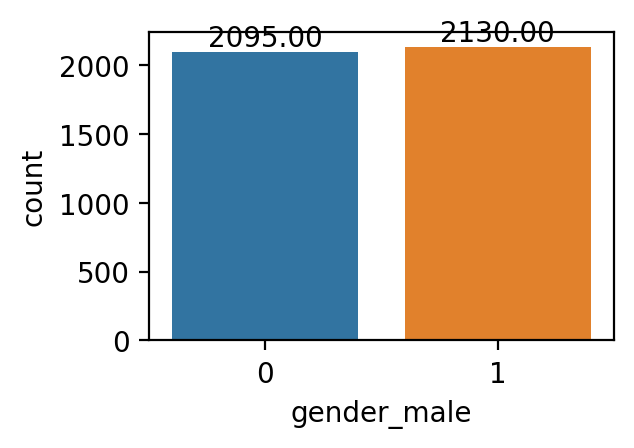


SENIOR_CITIZEN


senior_citizen  Count  Frequency
0               0   3528    0.83503
1               1    697    0.16497

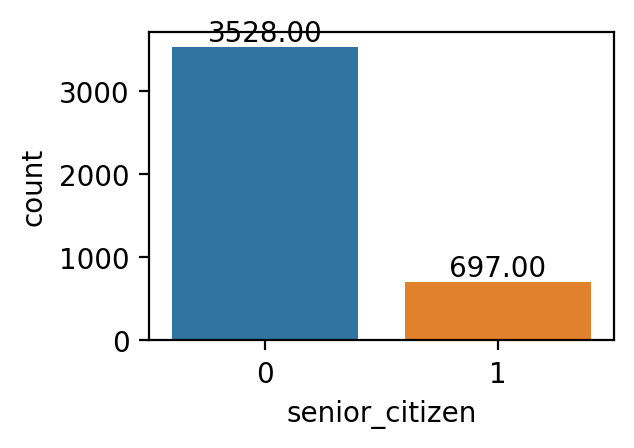


PARTNER


partner  Count  Frequency
0        0   2195   0.519527
1        1   2030   0.480473

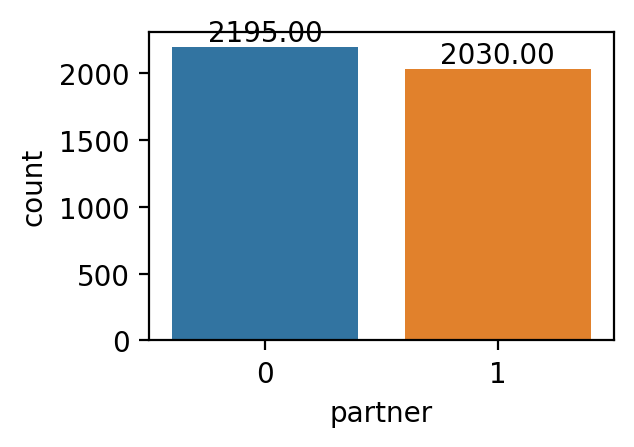


DEPENDENTS


dependents  Count  Frequency
0           0   2989   0.707456
1           1   1236   0.292544

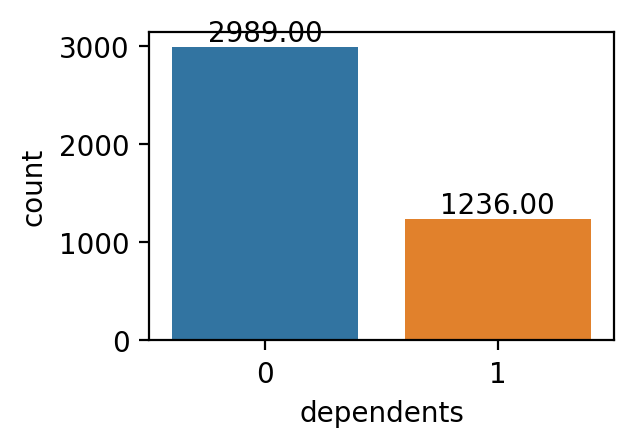


PHONE_SERVICE


phone_service  Count  Frequency
0              1   3791   0.897278
1              0    434   0.102722

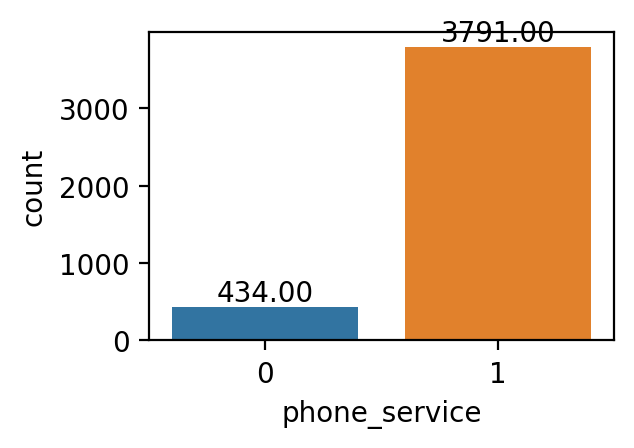


MULTIPLE_LINES


multiple_lines  Count  Frequency
0                No   2043   0.483550
1               Yes   1748   0.413728
2  No phone service    434   0.102722

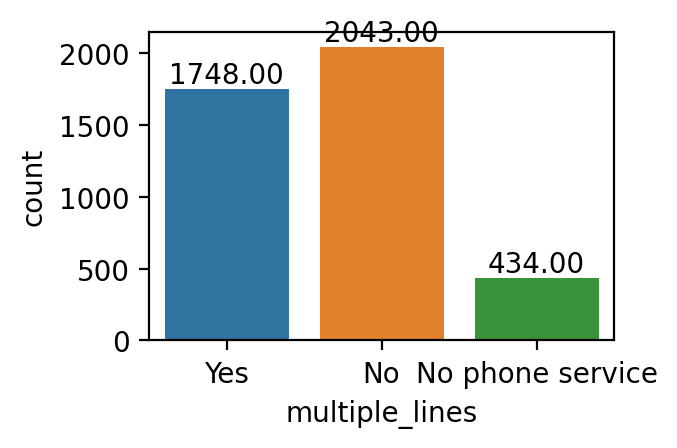


ONLINE_SECURITY


online_security  Count  Frequency
0                   No   2082   0.492781
1                  Yes   1190   0.281657
2  No internet service    953   0.225562

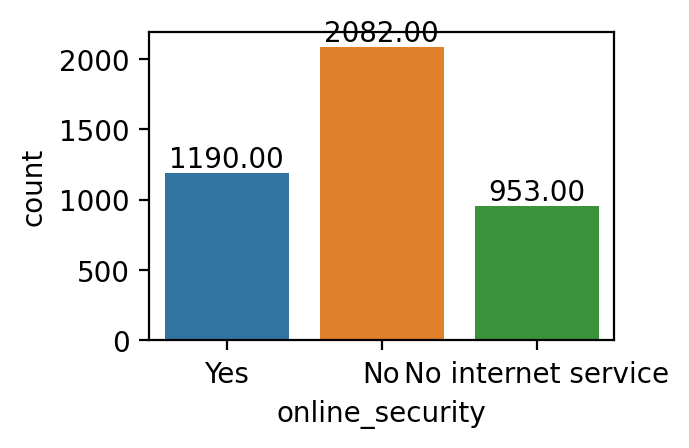


ONLINE_BACKUP


online_backup  Count  Frequency
0                   No   1840   0.435503
1                  Yes   1432   0.338935
2  No internet service    953   0.225562

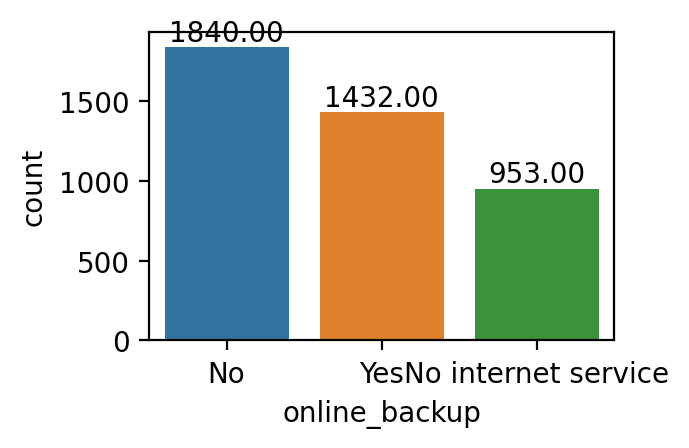


DEVICE_PROTECTION


device_protection  Count  Frequency
0                   No   1896   0.448757
1                  Yes   1376   0.325680
2  No internet service    953   0.225562

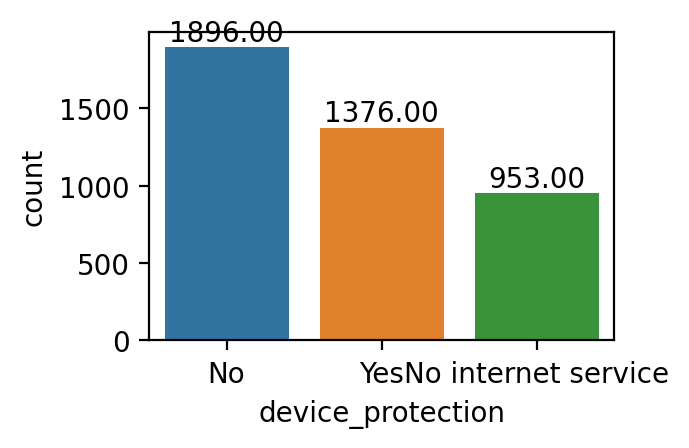


TECH_SUPPORT


tech_support  Count  Frequency
0                   No   2092   0.495148
1                  Yes   1180   0.279290
2  No internet service    953   0.225562

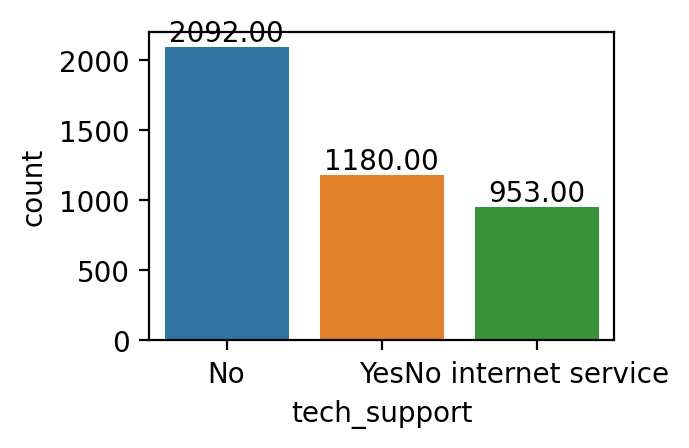


STREAMING_TV


streaming_tv  Count  Frequency
0                   No   1665   0.394083
1                  Yes   1607   0.380355
2  No internet service    953   0.225562

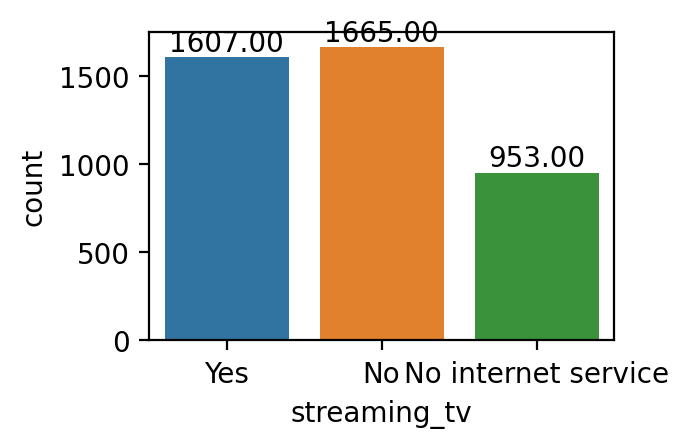


STREAMING_MOVIES


streaming_movies  Count  Frequency
0                   No   1671   0.395503
1                  Yes   1601   0.378935
2  No internet service    953   0.225562

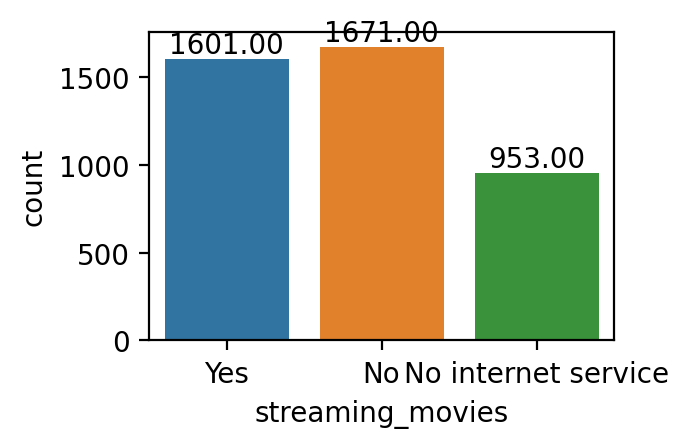


PAPERLESS_BILLING


paperless_billing  Count  Frequency
0                  1   2490   0.589349
1                  0   1735   0.410651

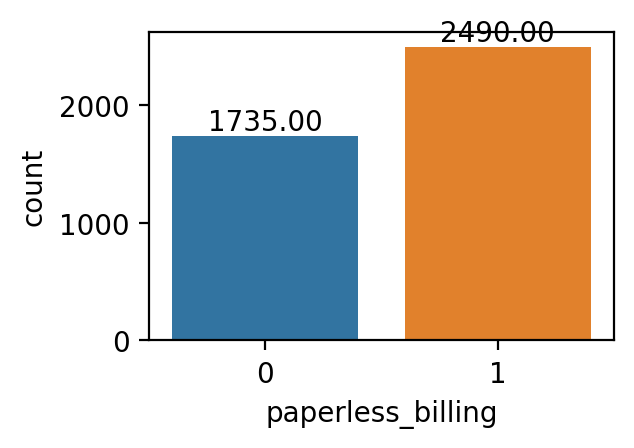


CHURN


churn  Count  Frequency
0      0   3104   0.734675
1      1   1121   0.265325

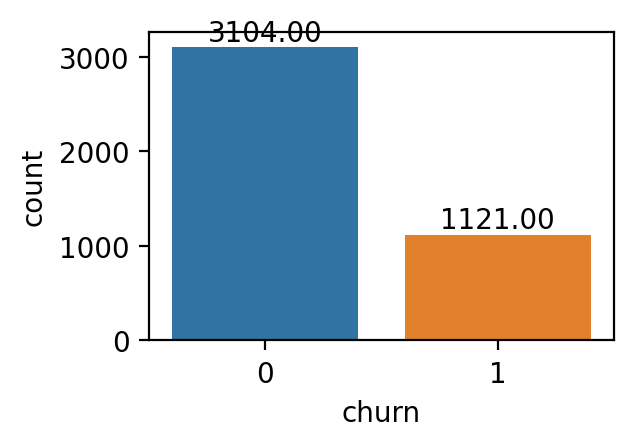


CONTRACT_TYPE


contract_type  Count  Frequency
0  Month-to-month   2347   0.555503
1        Two year   1011   0.239290
2        One year    867   0.205207

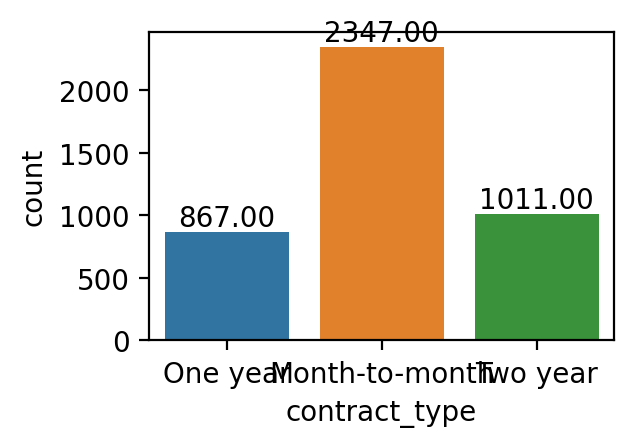


INTERNET_SERVICE_TYPE


internet_service_type  Count  Frequency
0           Fiber optic   1840   0.435503
1                   DSL   1432   0.338935
2                  None    953   0.225562

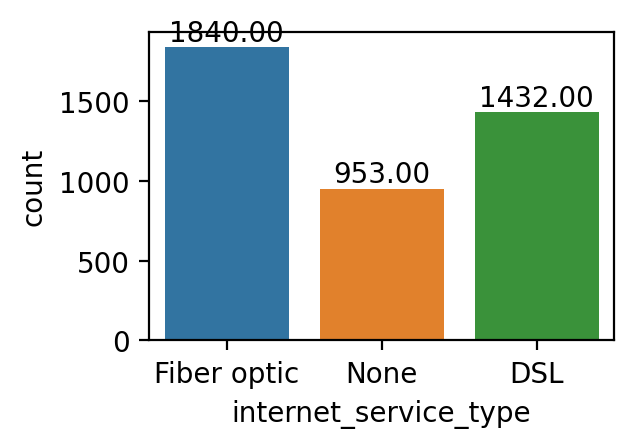


PAYMENT_TYPE


payment_type  Count  Frequency
0           Electronic check   1426   0.337515
1               Mailed check    973   0.230296
2    Credit card (automatic)    931   0.220355
3  Bank transfer (automatic)    895   0.211834

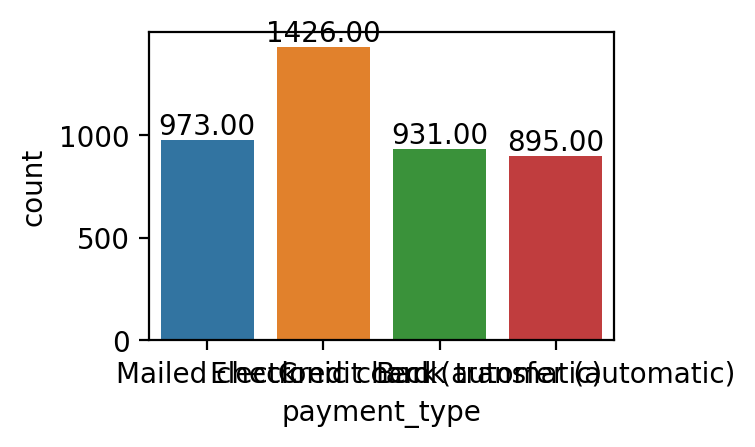

In [7]:
e.explore_univariate_categorical_cols(telco, cat_cols=cat_cols)

Customer insights:
- 26.5% churn
- 50% males
- 16.5% seniors
- 48% have a partner
- 29% have dependent(s)
- 90% have phone service
    - 45% have multiple lines
- 78% have internet service
    - 55% have fiber optic
    - ~50% stream movies, stream tv
    - ~35% have tech support, online security
    - ~40% have device protection, online backup
- 59% of billing is paperless
- 55% of contracts are month-to-month
- payment types are about even with 33% paying by electronic check

Continuous

In [ ]:
e.explore_univariate_continuous_cols(telco, cont_cols=cont_cols)

204 entries have a tenure of 72. Checkout in prep

Investigate customers with tenure of 72. May have missed duplicate customers (with different IDs).
- checked and saw no duplicates

Customer Insights:
- Tenure: mean of 32, median of 28, min/max 0/72
- Monthly Charges: mean of \~64, median of \~70, min/max \~18/\~119
- Total Charges: mean of \~2222, median of \~1328, min/max \~19/\~8,685

###### 1C. Bivariate Stats

Categorical feartures to target

customer_id is continuous but not numeric. Check if column needs to be cleaned
Categorical feature (integer-type) "correlations" (Pearson R) to churn:


churn                                    1.000000
internet_service_type_fiber_optic        0.300361
payment_type_electronic_check            0.297764
paperless_billing                        0.173635
senior_citizen                           0.143092
streaming_tv_yes                         0.059212
streaming_movies_yes                     0.058805
multiple_lines_yes                       0.027442
phone_service                            0.009096
multiple_lines_no_phone_service         -0.009096
gender_male                             -0.022670
online_backup_yes                       -0.070157
device_protection_yes                   -0.071025
payment_type_mailed_check               -0.086790
payment_type_credit_card_(automatic)    -0.151349
dependents                              -0.155480
partner                                 -0.158386
tech_support_yes                        -0.160216
online_security_yes                     -0.171309
contract_type_one_year                  -0.173943


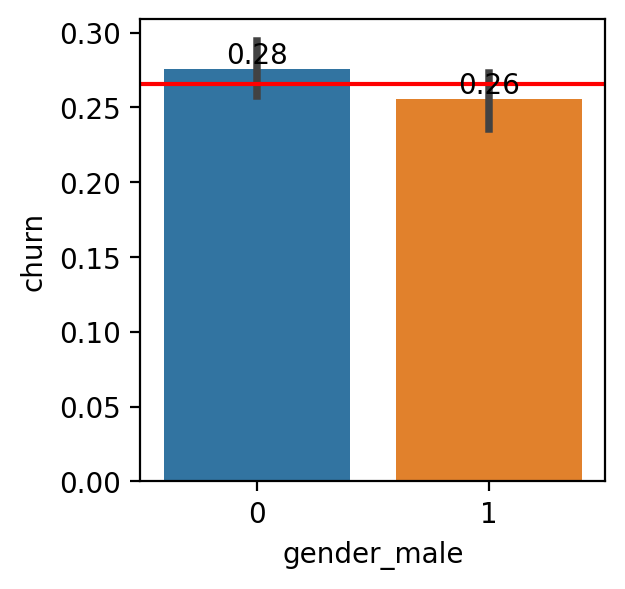

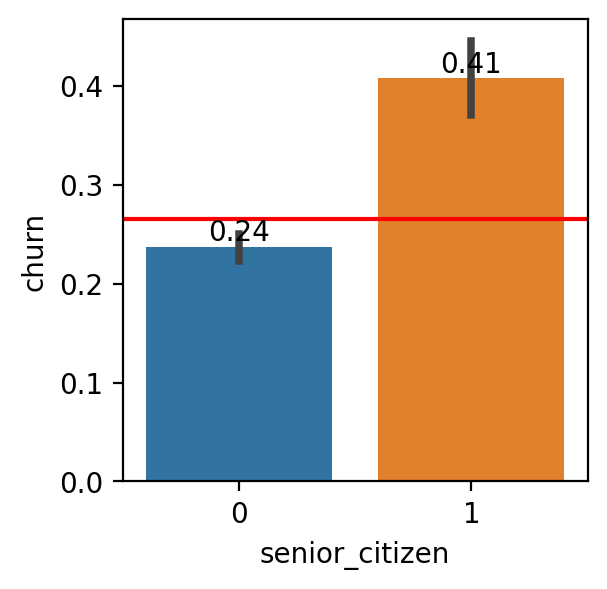

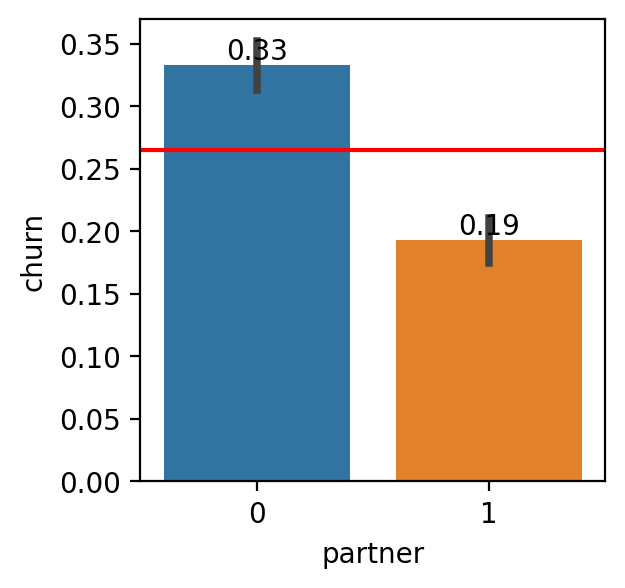

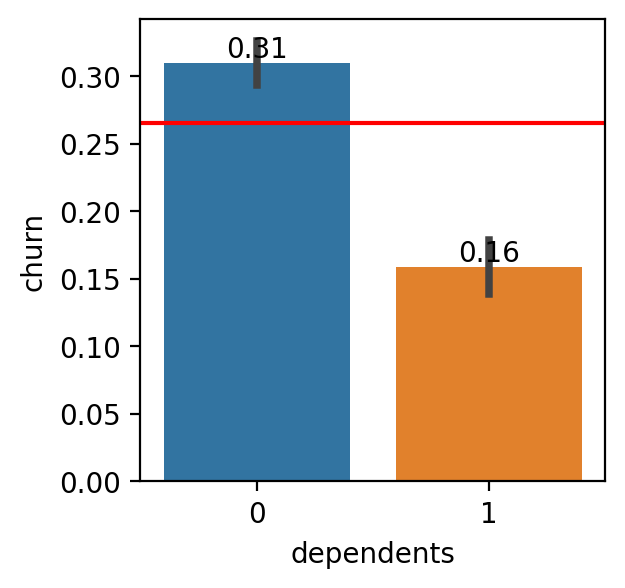

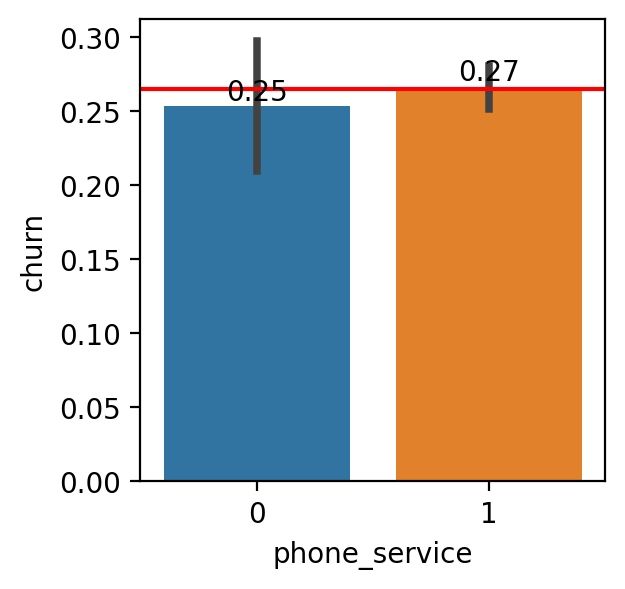

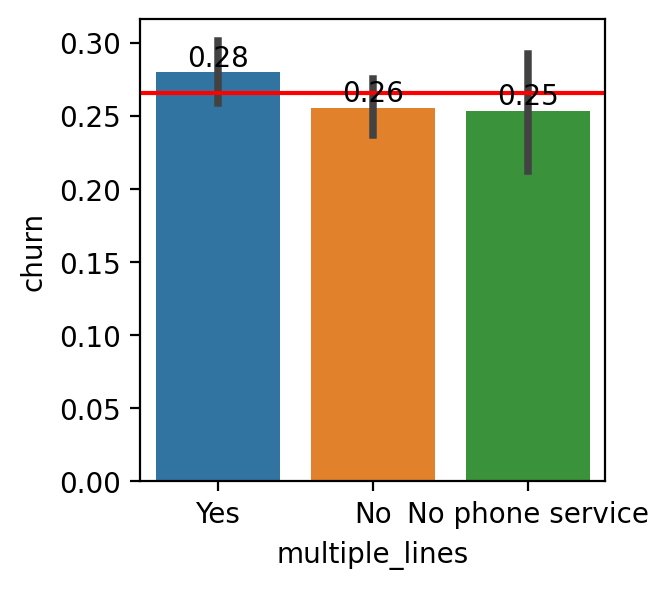

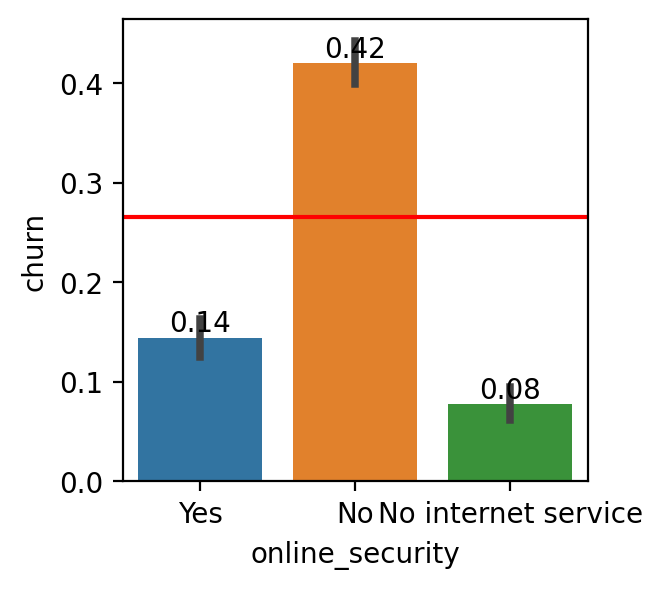

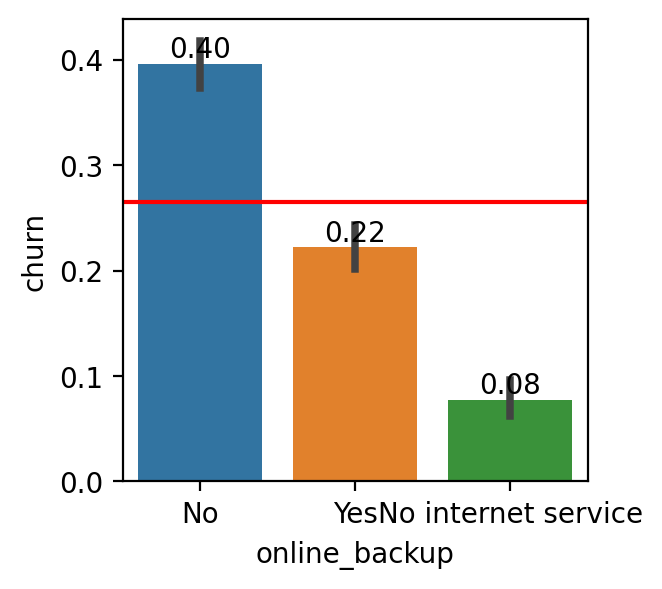

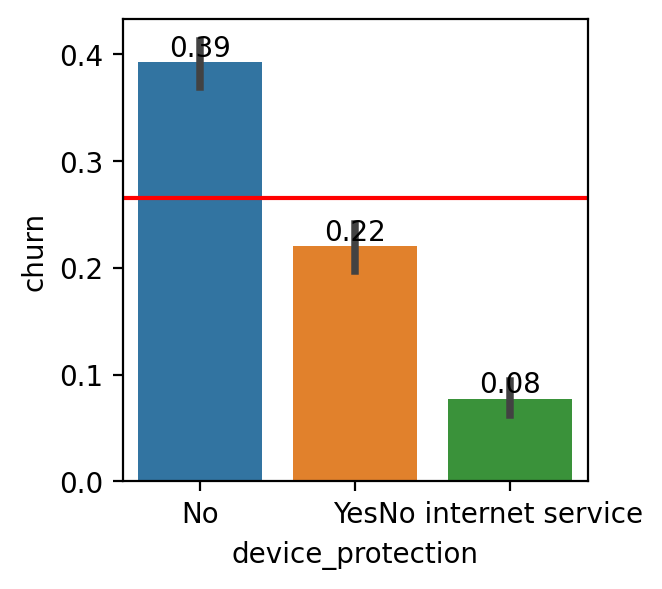

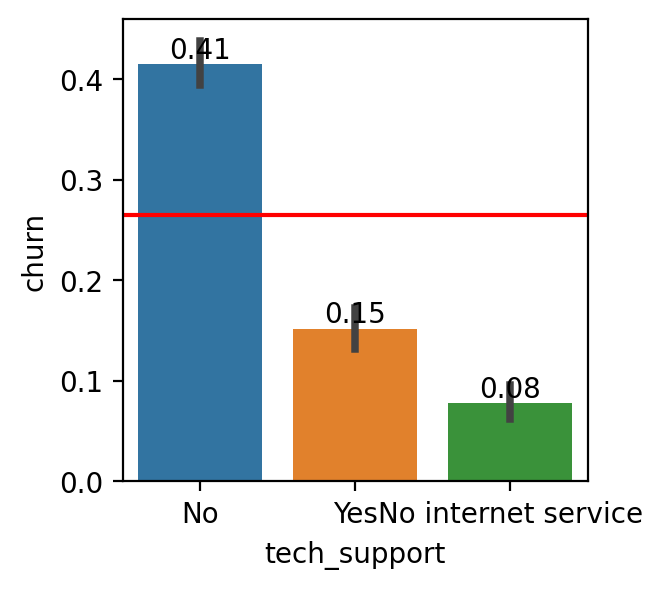

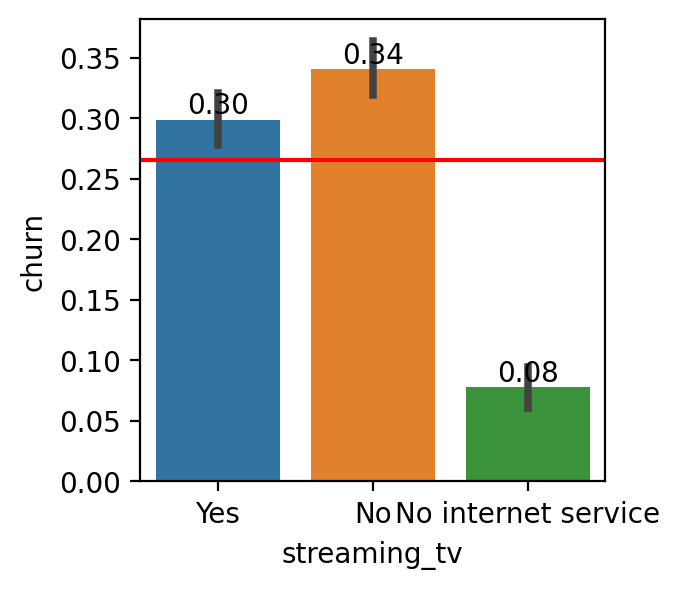

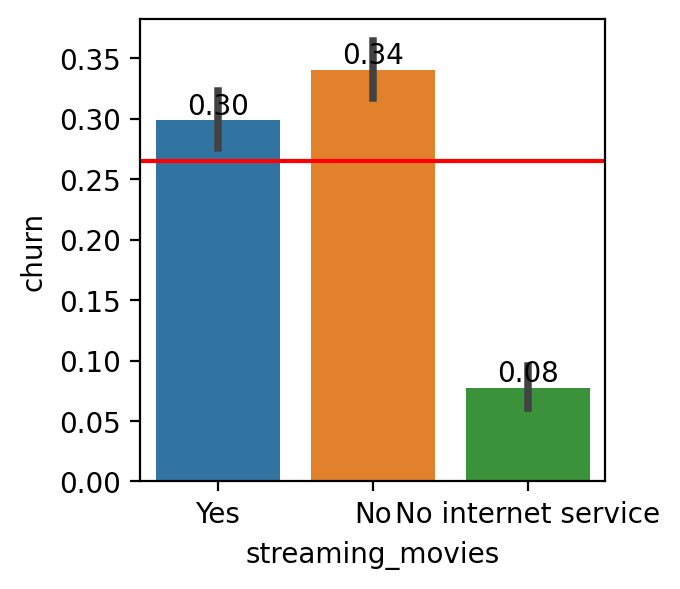

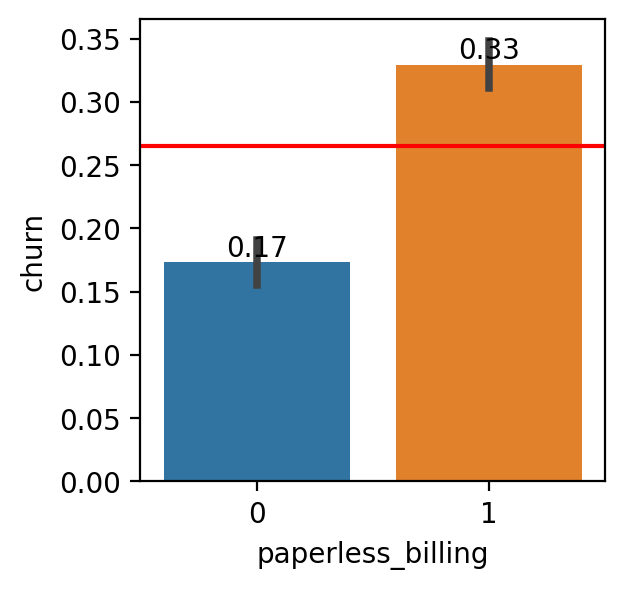

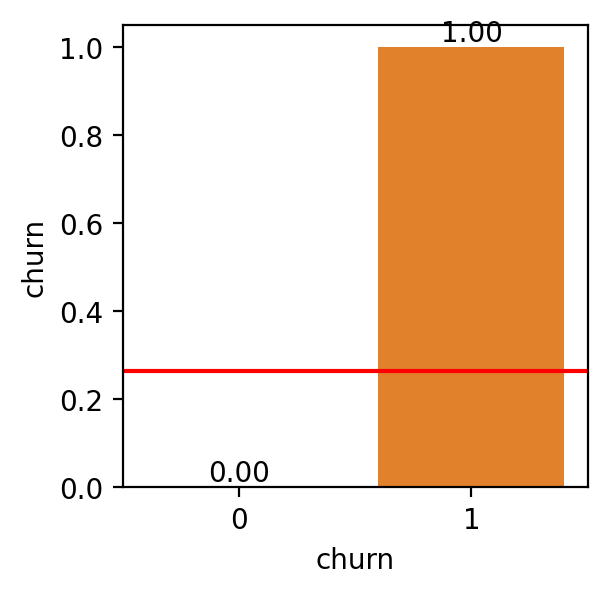

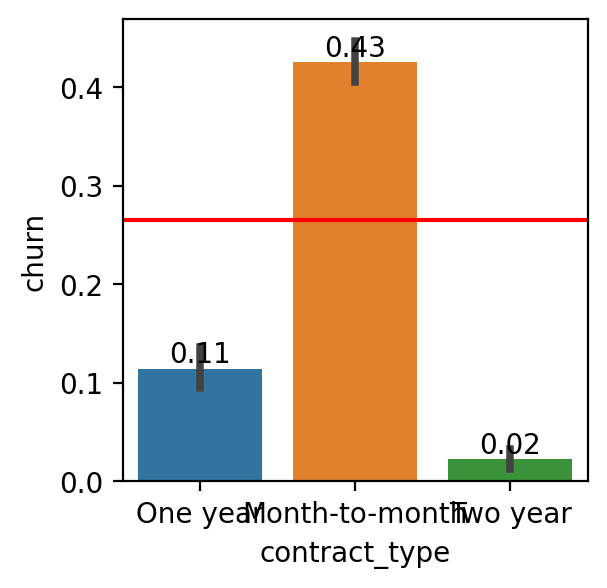

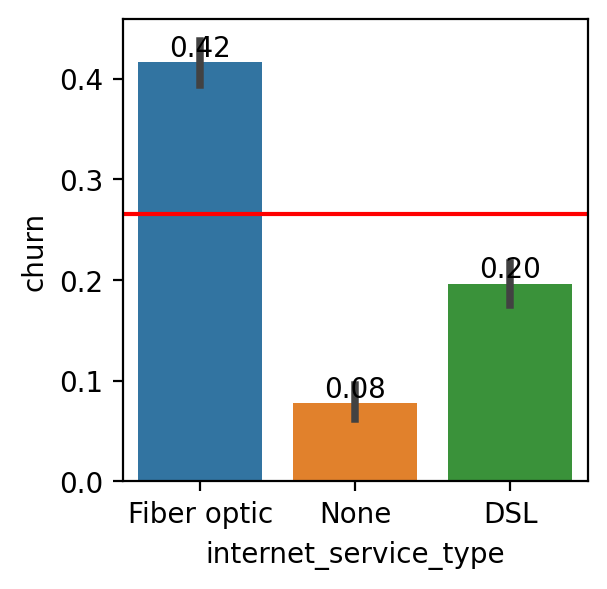

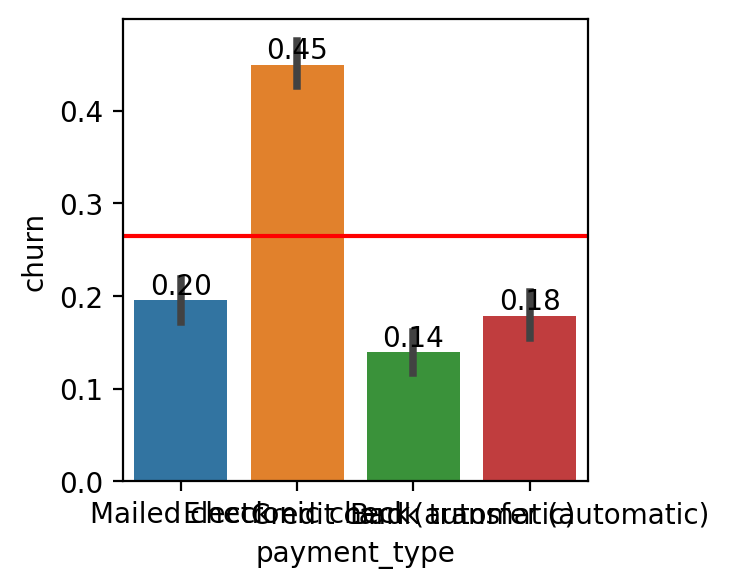

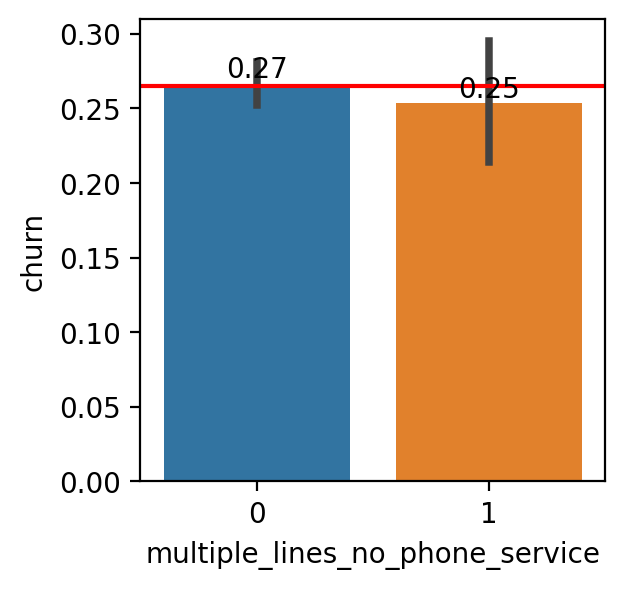

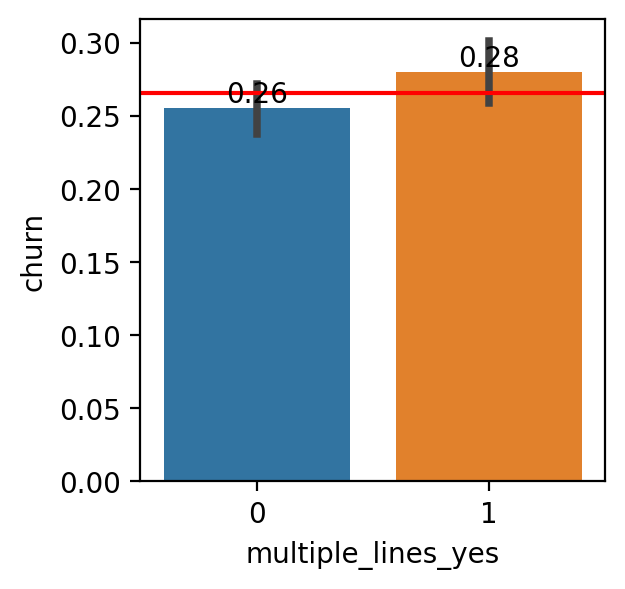

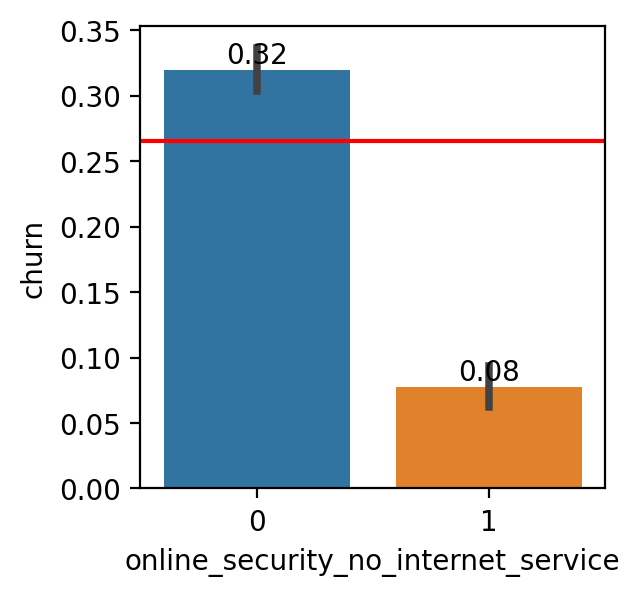

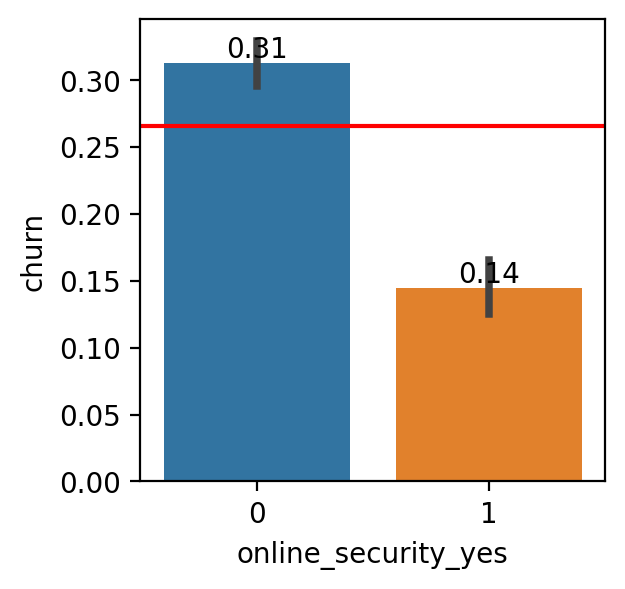

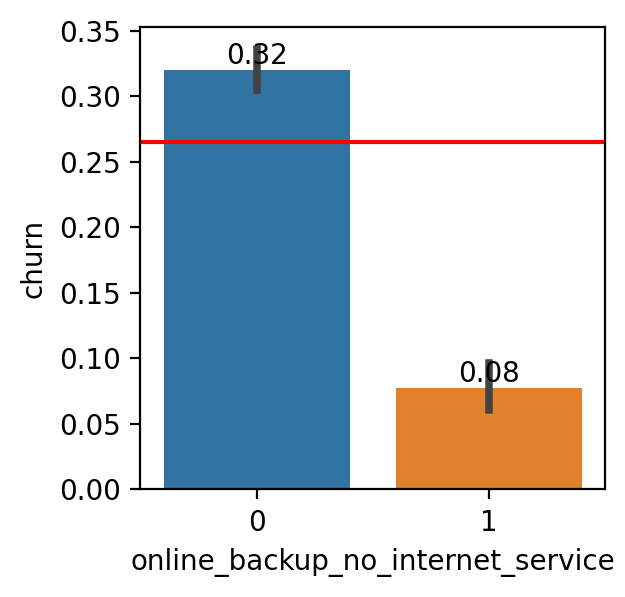

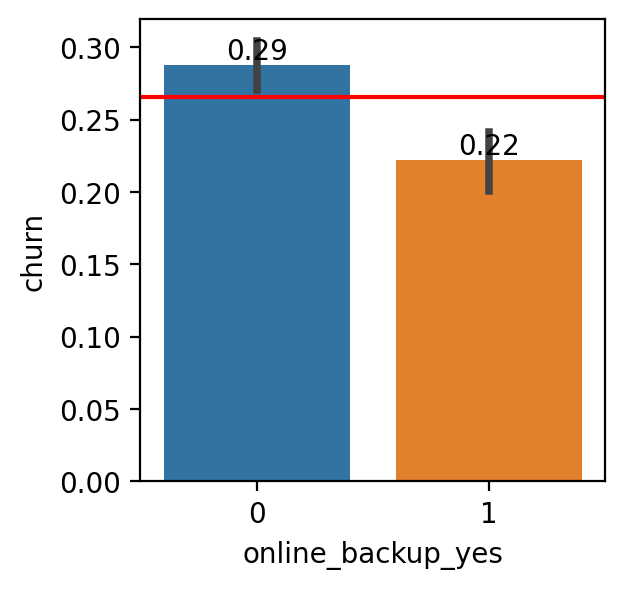

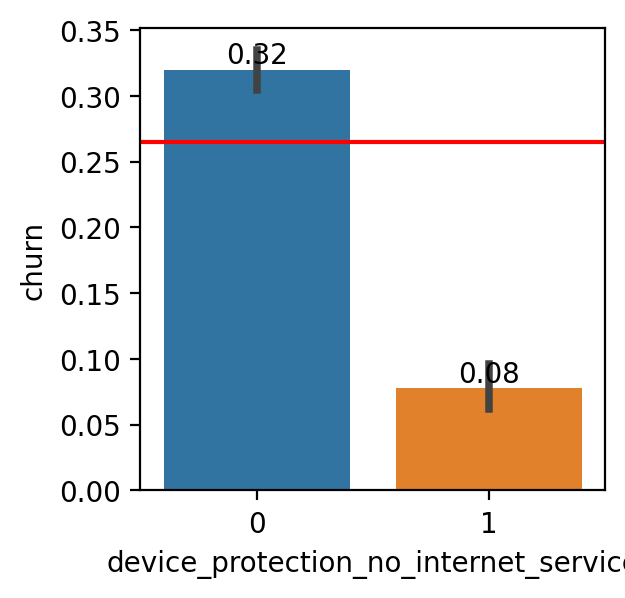

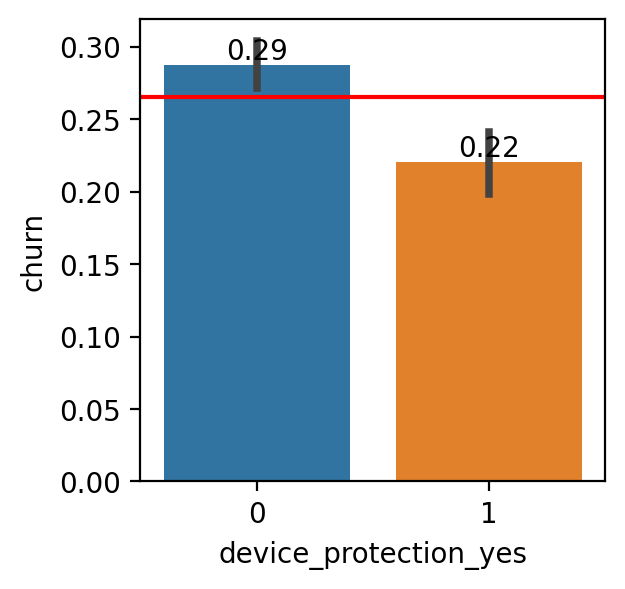

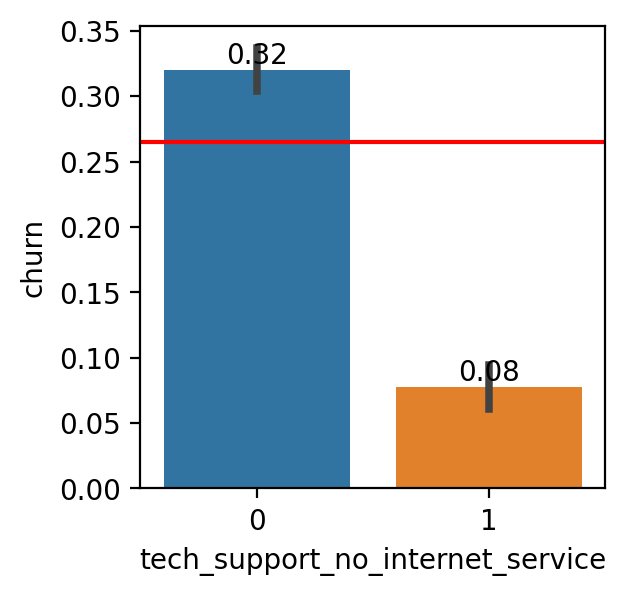

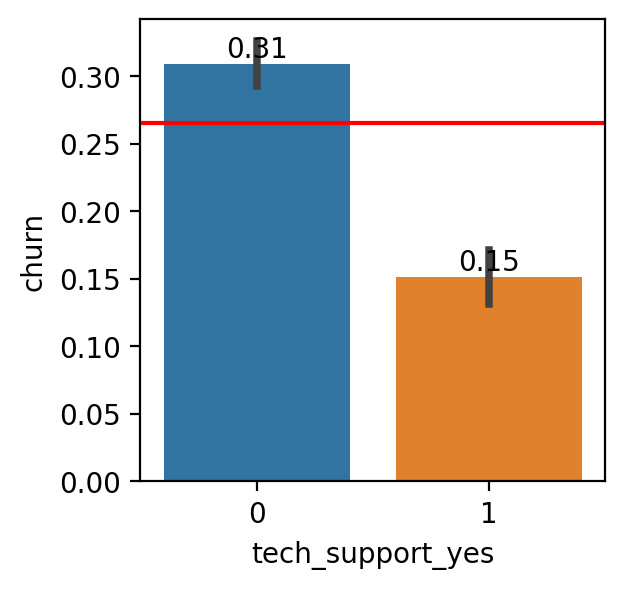

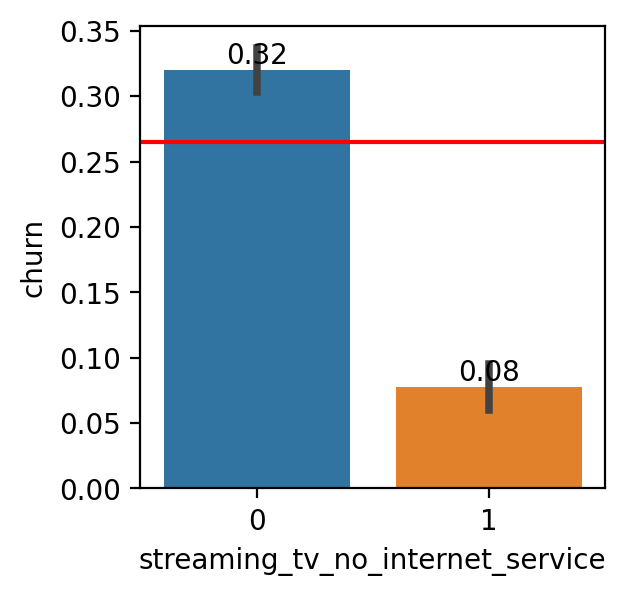

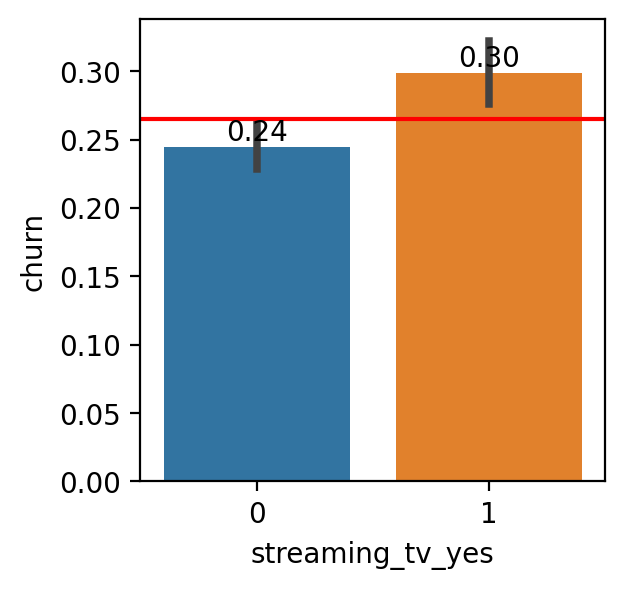

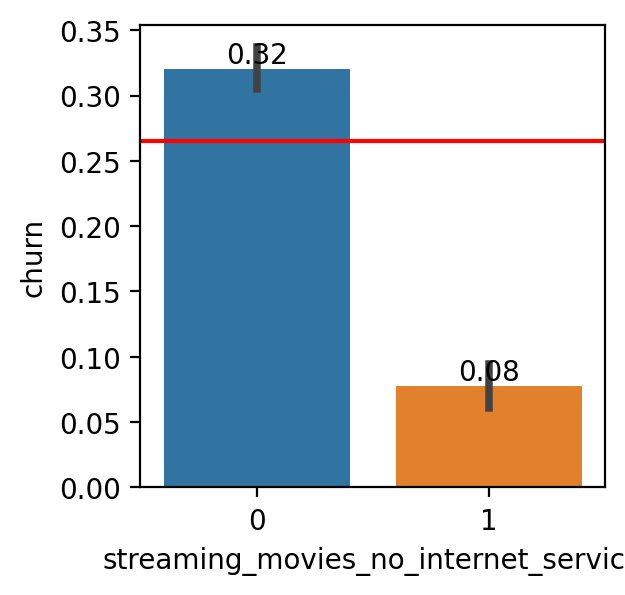

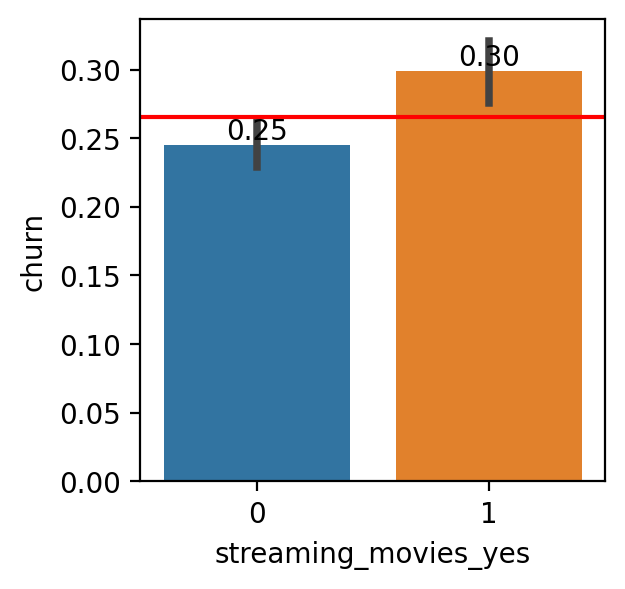

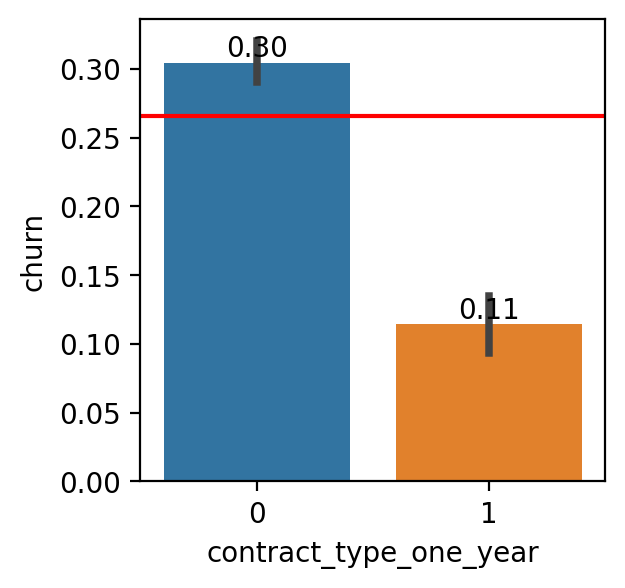

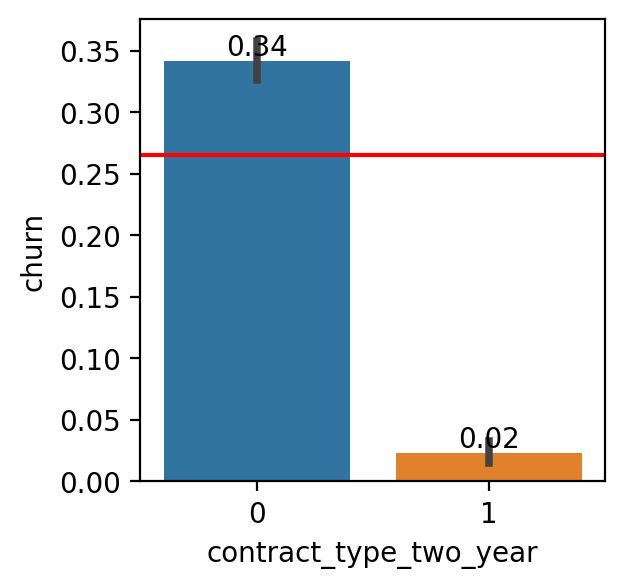

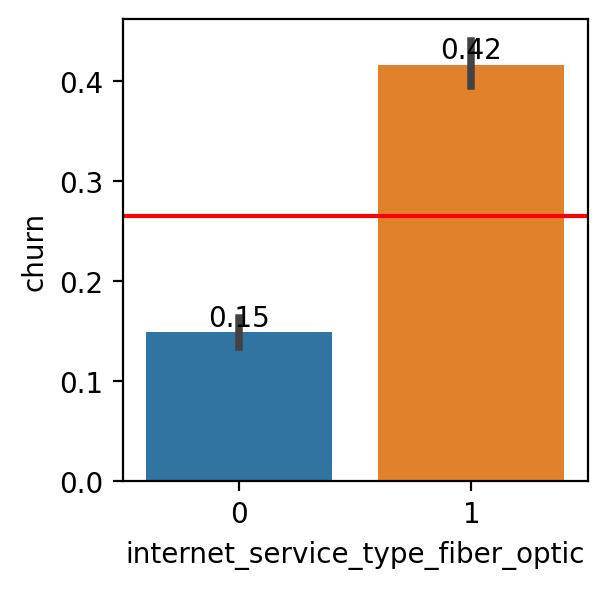

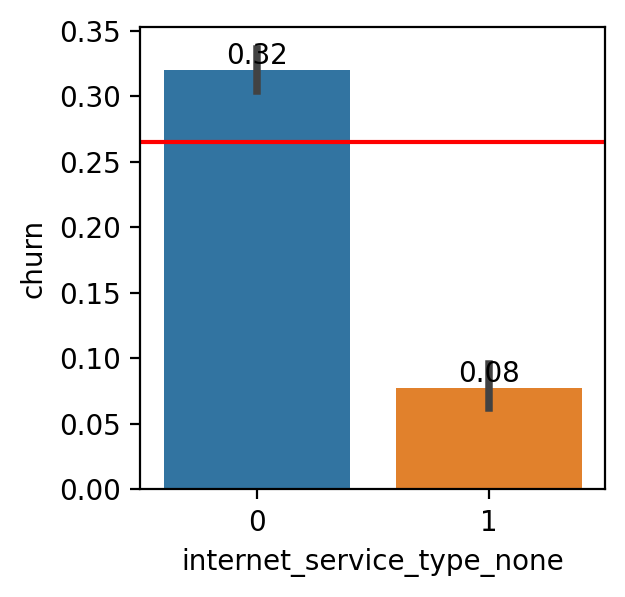

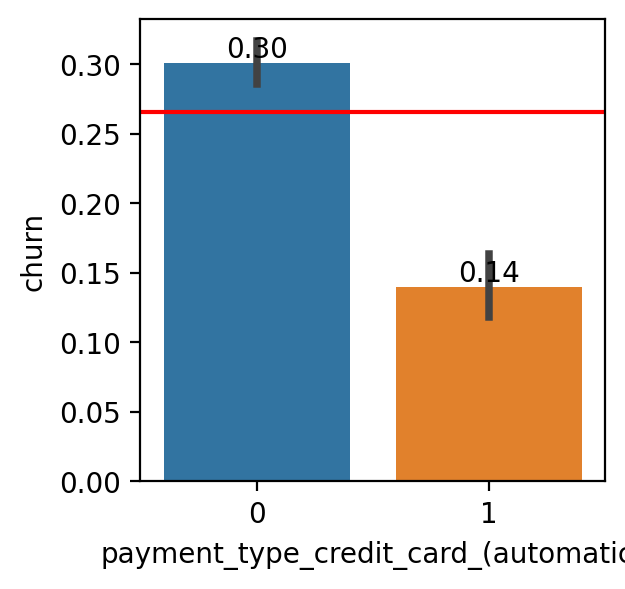

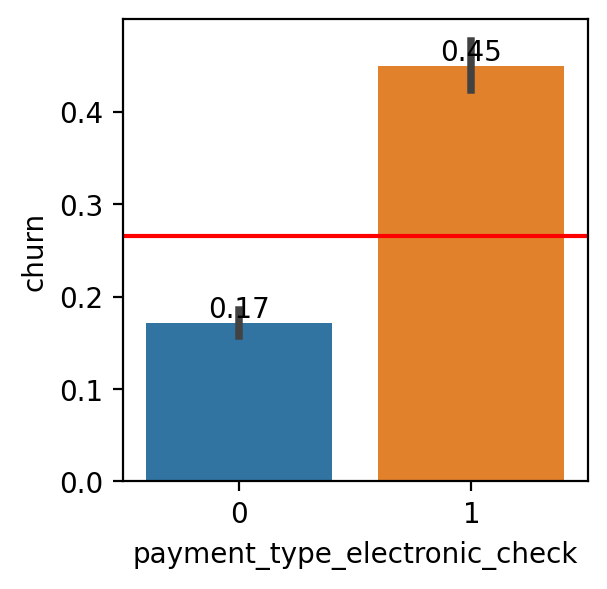

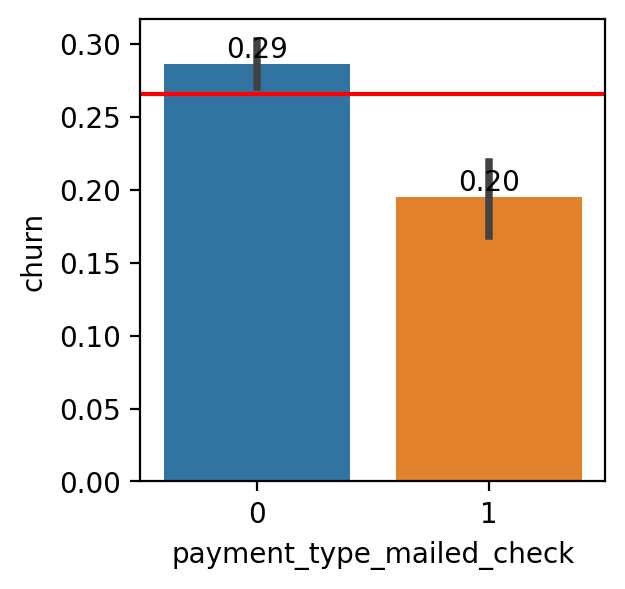

/Users/martinreyes/codeup-data-science/classification-project-predict-churning-customers/explore.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
/Users/martinreyes/codeup-data-science/classification-project-predict-churning-customers/explore.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',


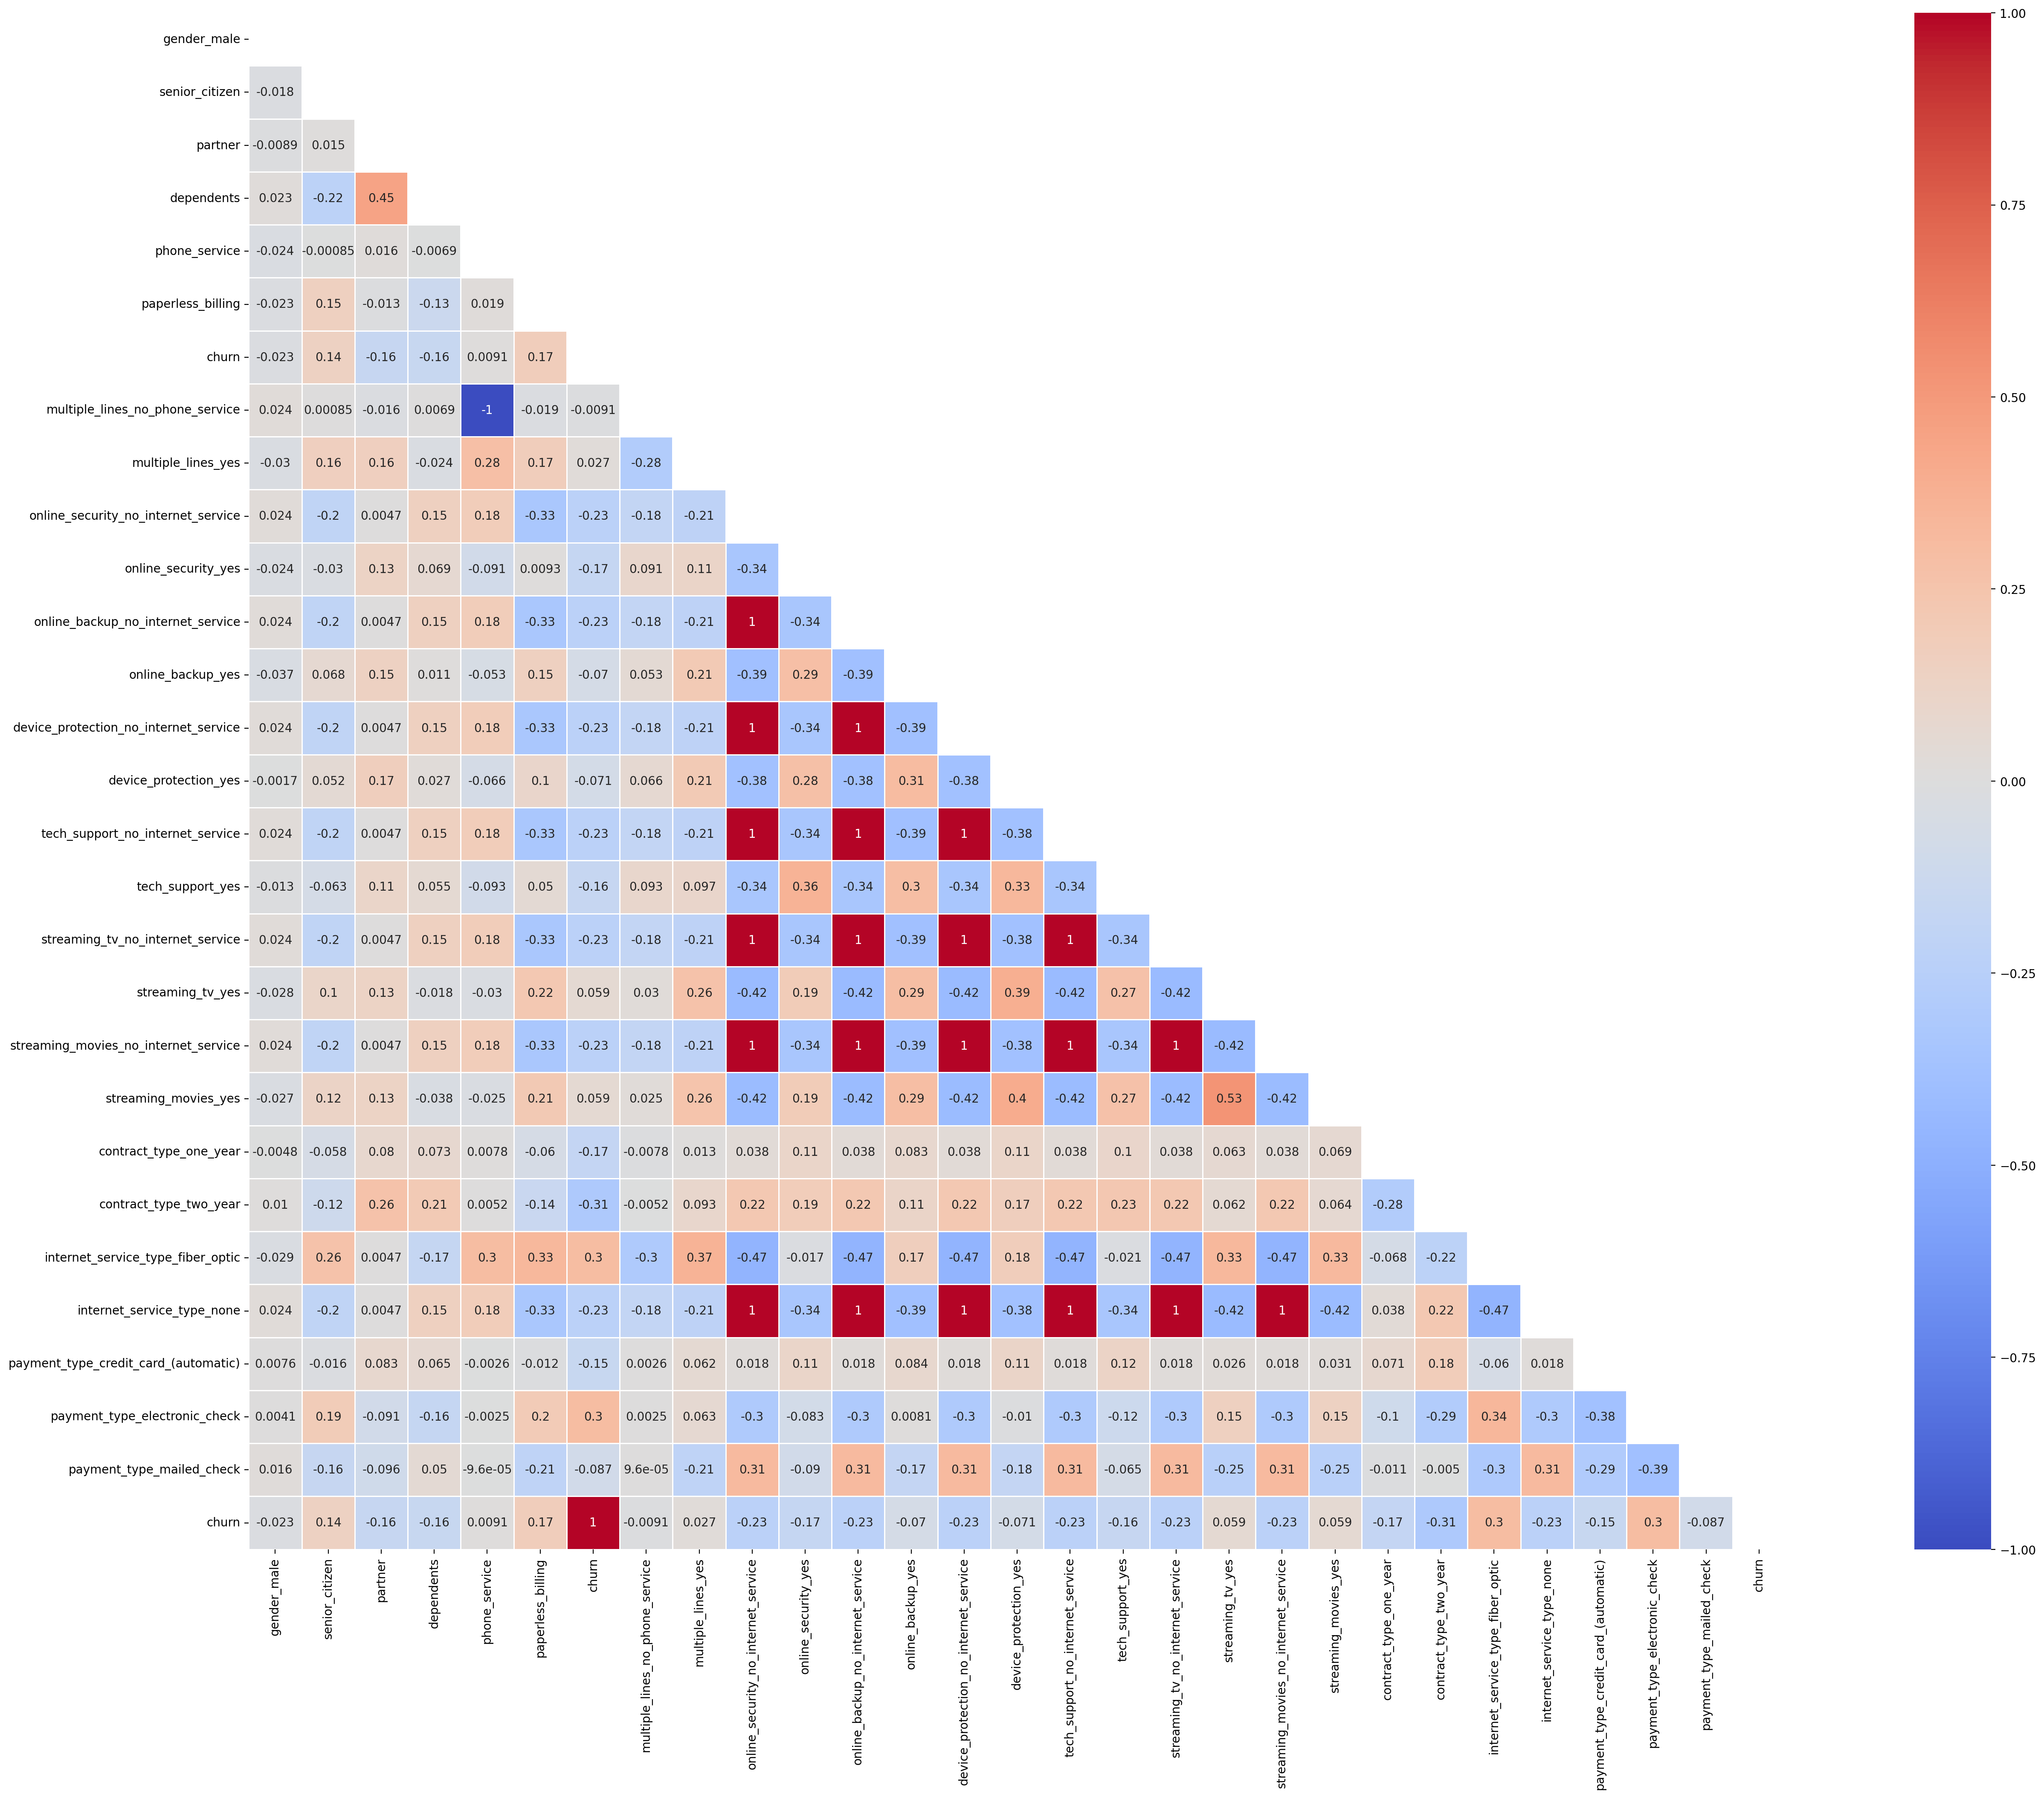

In [8]:
e.explore_bivariate_cat_to_cat_target(df=telco, target='churn')

Insights:
- Strong drivers of churn: 40%+ churn rate 
    - payment by electronic check
    - fiber optic internet service type
    - not being on a two-year contract
    - being on a month-to-month contract
    - not having online security    
- Moderate drives of churn
    - paperless billing
    - being a senior
    - not having tech support, online backup, or device protection
- Weak drivers of churn: ~27% churn rate
    - gender
    - having a phone service
    - having multiple lines
    - streaming TVs and movies
    - mailed check payment type


Strong Features to use for modeling
- `internet_service_type_fiber_optic`, `contract_type_two_year `, `payment_type_electronic_check`, `internet_service_type_none`, `contract_type_one_year `, `online_security_no_internet_service`, 
`online_security_yes`

Continuous feartures to target

churn                            0            1
tenure          count  3104.000000  1121.000000
                mean     37.304446    17.382694
                std      24.134662    19.422300
                min       0.000000     1.000000
                25%      14.000000     2.000000
                50%      38.000000     9.000000
                75%      60.000000    27.000000
                max      72.000000    72.000000
monthly_charges count  3104.000000  1121.000000
                mean     60.501176    73.427208
                std      31.296424    24.905173
                min      18.250000    19.000000
                25%      24.850000    55.000000
                50%      63.975000    79.100000
                75%      88.112500    93.800000
                max     118.750000   118.350000
total_charges   count  3104.000000  1121.000000
                mean   2495.189417  1467.048394
                std    2313.920778  1872.256664
                min      18.900000    19.300000
                25%     550.537500   123.650000
                50%    1577.100000   631.850000
                75%    4175.425000  2177.450000
                max    8672.450000  8684.800000

Continuous feature correlations (Pearson R) to churn:


churn              1.000000
monthly_charges    0.188526
total_charges     -0.201645
tenure            -0.357545
Name: churn, dtype: float64

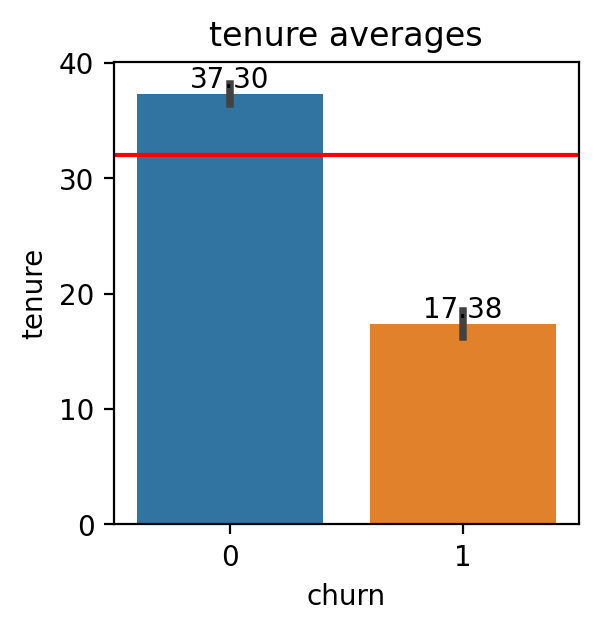

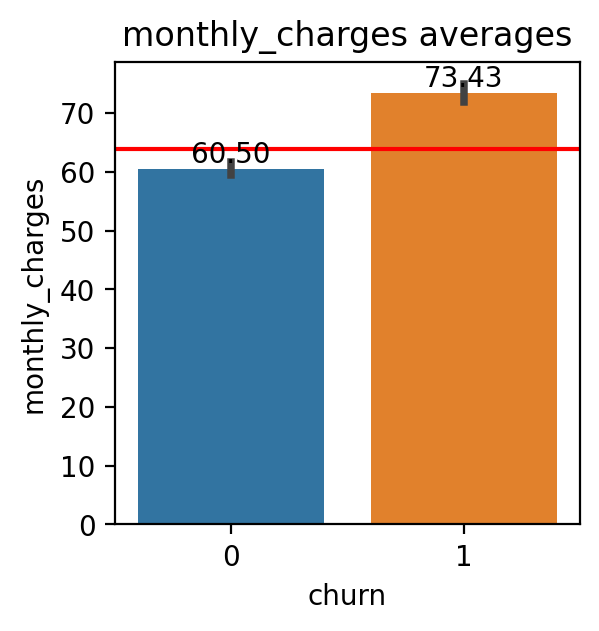

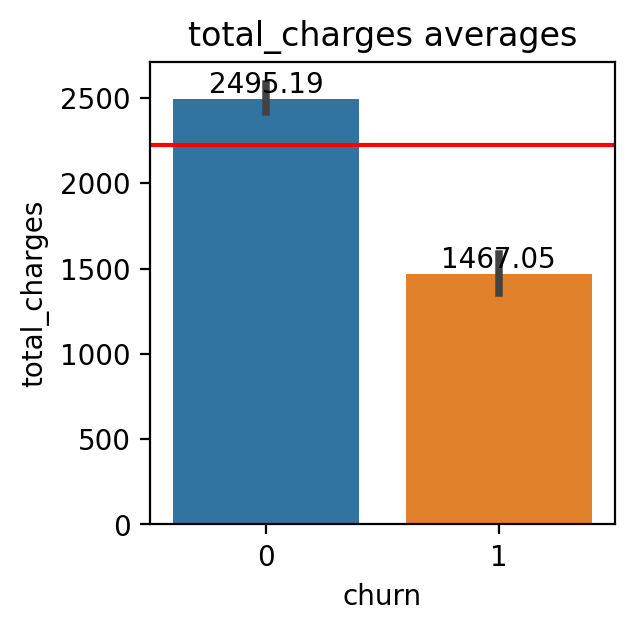

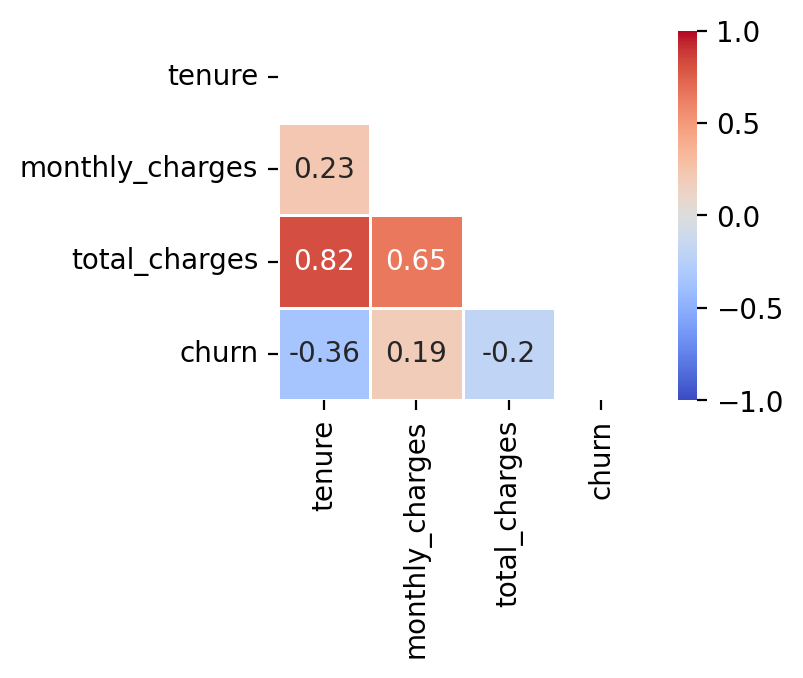

In [9]:
e.explore_bivariate_cont_to_cat_target(df=telco, target='churn', cont_cols=cont_cols)

Insights:
- Less tenure relates to more churn.
- Higher monthly charges leads to more churn, but this relationship isn't as strong as tenure
- Lower total charges leads to more churn, but this relationship isn't as strong as tenure
- Total charges is related to tenure so we won't run both in the model.
- For our first run of modeling, the only continuous feature we will use is `tenure`.

###### 1D. Answer specific questions

- How do the following features relate to churn?:
    - tenure
    - internet service types
    - paying by electronic check
    - contract type
    - gender

Tenure relation to churn

###### 2. Visualize

Text(0.5, 1.0, 'Tenure Distribution of Churned Customers')

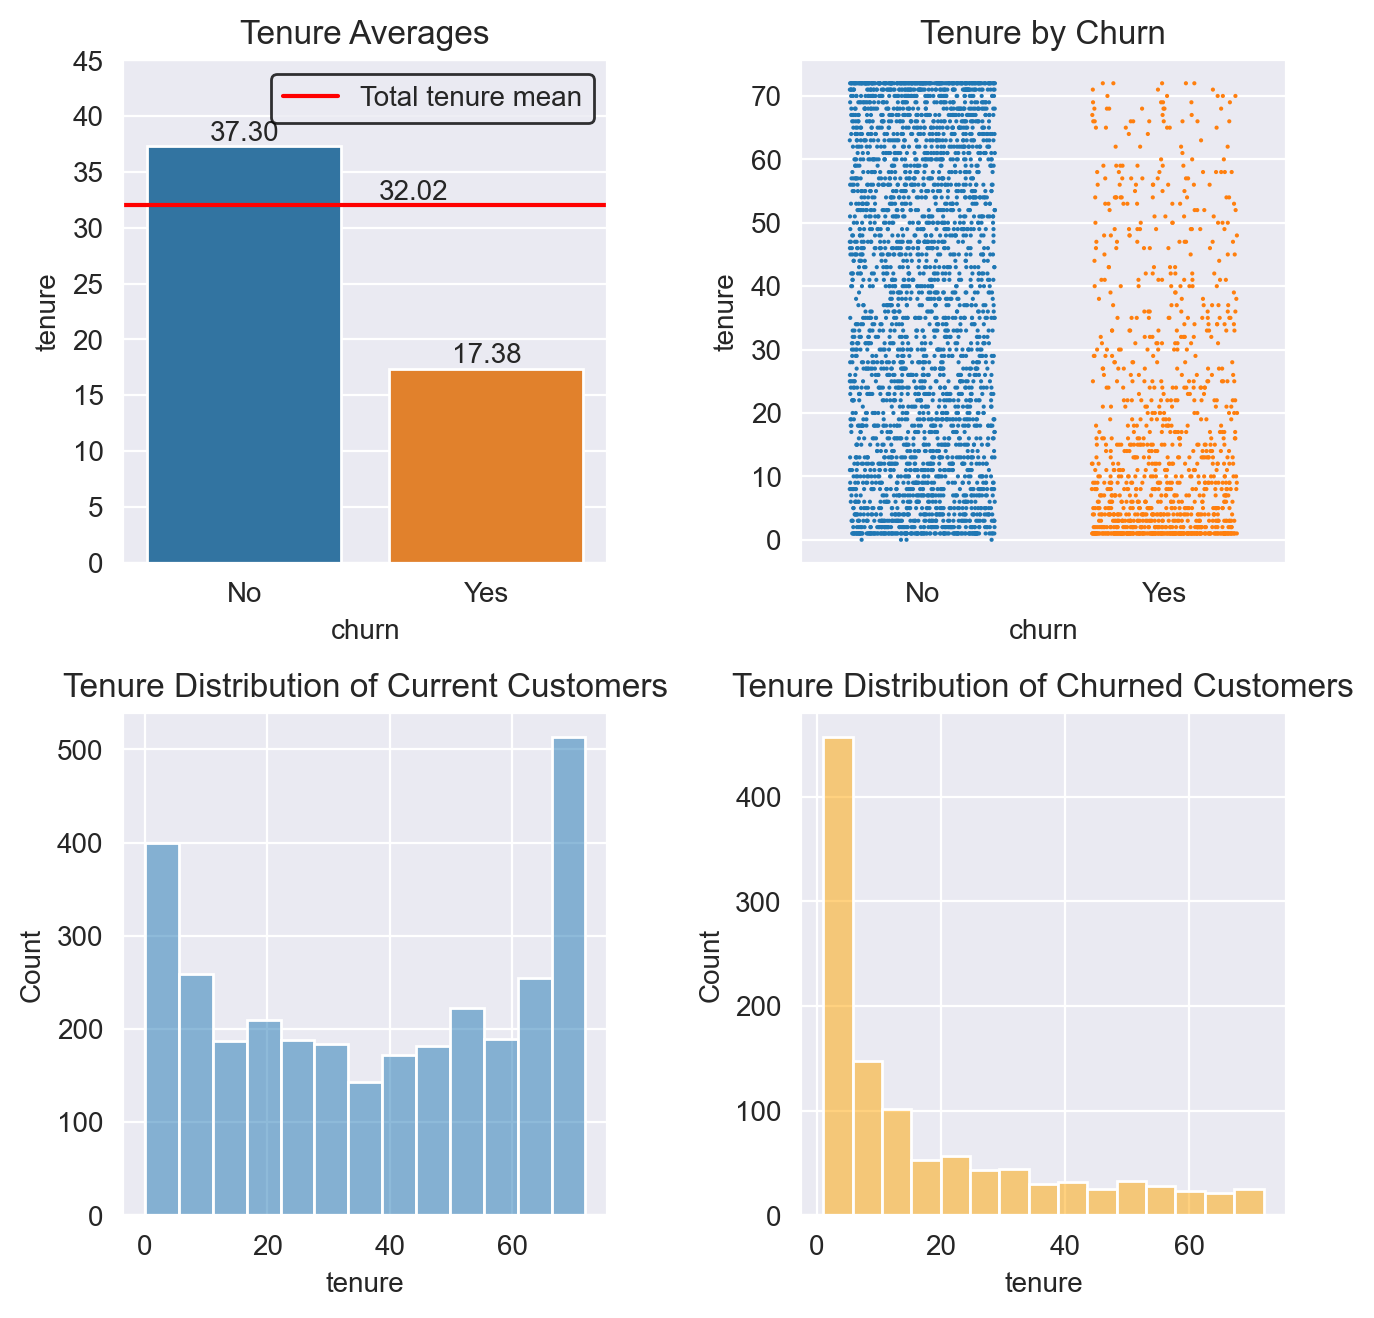

In [10]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(7.5, 7.5))
plt.subplots_adjust(hspace=.3, wspace=0.4)

# first plot
sns.barplot(x='churn', y='tenure', data=telco, errorbar=None, ax=axes[0,0])
# Annotate the bars
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
axes[0,0].set_title('Tenure Averages')
axes[0,0].set_xticks([0, 1], ['No', 'Yes'])
axes[0,0].set_yticks(range(0, 46, 5))
# add line indicating total tenure average
axes[0,0].axhline(telco['tenure'].mean(), label=f'Total tenure mean', color='red')
axes[0,0].annotate(f'{telco["tenure"].mean():.2f}', xy=(.7, telco['tenure'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0,0].legend(loc='upper right', edgecolor='black')

# second plot
sns.stripplot(data=telco, x='churn', y='tenure', hue='churn', jitter=.3,
              size=1.5, ax=axes[0,1], legend=False)
axes[0,1].set_title('Tenure by Churn')
axes[0,1].set_xticks([0, 1], ['No', 'Yes'])

plt.xticks()


# third plot
non_churner_data = telco[telco['churn']==0]
sns.histplot(hue='churn', x='tenure', data=non_churner_data, ax=axes[1,0], legend=False)
axes[1,0].set_title('Tenure Distribution of Current Customers')

# fourth plot
churner_data = telco[telco['churn']==1]
sns.histplot(hue='churn', x='tenure', data=churner_data, ax=axes[1,1],
             palette=['orange'], legend=False)
axes[1,1].set_title('Tenure Distribution of Churned Customers')


###### 3. Stats test: Independent (Two-Sample) T-Test (2-sided)

* state hypotheses and siginificance level
    * $H_0$: There is no difference in average tenure for churners and non-churners.
    * $H_a$: There is a difference in average tenure for churners and non-churners.
    * $\alpha = .05$
* verify assumptions
    * Independence: Assumption met
    * Normality: Assumption met with large sample sizes
    * Equal Variances: Check with Levene's test
        * Variances are not equal, so we will set `equal_var=False` for the test

In [25]:
print(f"tenure variance for churners: {churner_data['tenure'].var()}")
print(f"tenure variance for non-churners: {non_churner_data['tenure'].var()}")
stat_levene, p_levene = stats.levene(churner_data['tenure'], non_churner_data['tenure'])
print(f'''A p value of {p_levene:.2e}, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal''')

tenure variance for churners: 377.2257359500464
tenure variance for non-churners: 582.4818880589455
A p value of 3.45e-61, which is less than .05, indicates that our sample variances between
            churners and non-churners are not equal


* run test and interpret results

In [24]:
stat_ttest, p_ttest = stats.ttest_ind(churner_data['tenure'], non_churner_data['tenure'], equal_var=False)
print(f'''A p value of {p_ttest:.2e}, which is less than .05, indicates that churn is dependent on tenure''')

A p value of 2.00e-145, which is less than .05, indicates that churn is dependent on tenure


###### 4. Conclude

With a low p value, we can conclude that **churn is dependent on tenure**.

---
Internet service type relation to churn

###### 2. Visualize

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

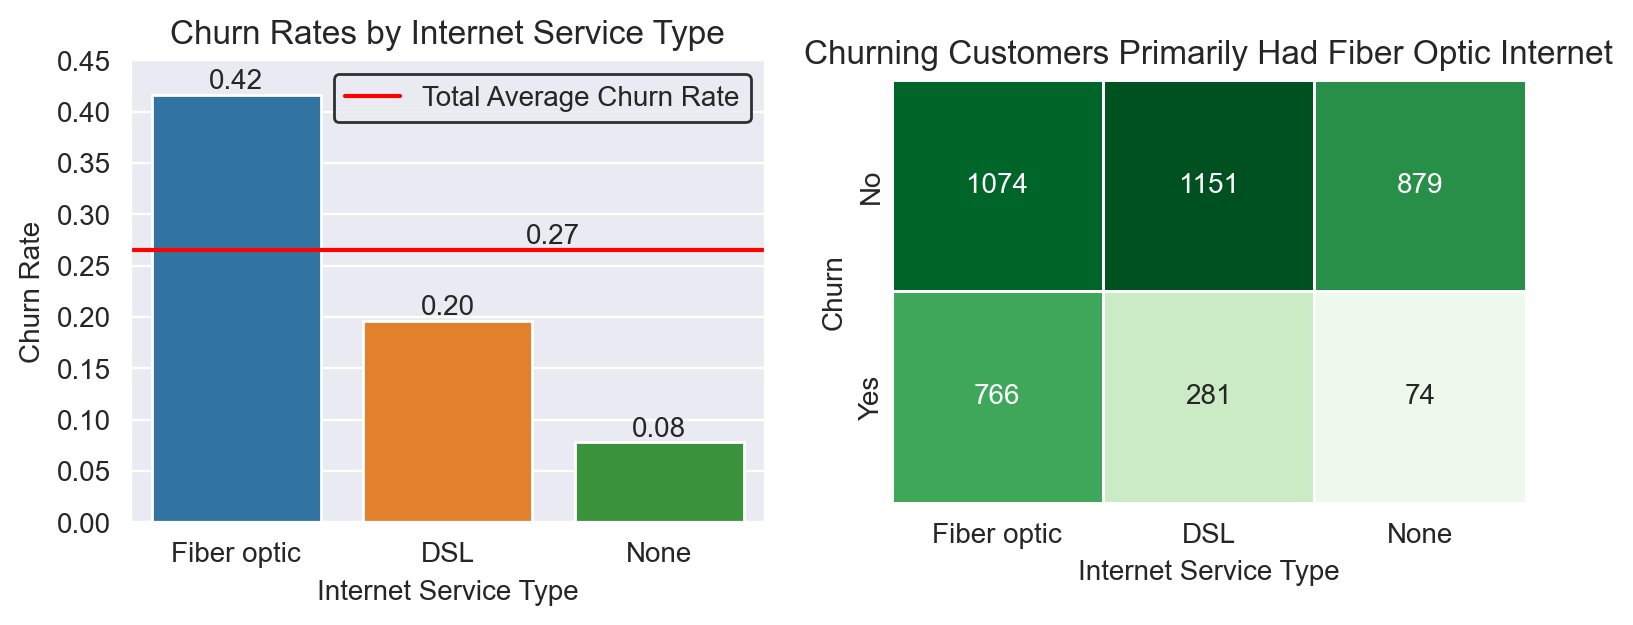

In [49]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# first plot
order = telco.groupby('internet_service_type')['churn'].mean().sort_values(ascending=False).index
sns.barplot(x='internet_service_type', y='churn', data=telco, errorbar=None,  order=order,
            ax=axes[0])
# Annotate the bars
ax = plt.gca()
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
axes[0].set_title('Churn Rates by Internet Service Type')
axes[0].set_xlabel('Internet Service Type')
axes[0].set_ylabel('Churn Rate')
axes[0].set_yticks(np.arange(0, .46, 0.05))
# add line indicating estimate of all targets
axes[0].axhline(telco['churn'].mean(), label='Total Average Churn Rate', color='red')
axes[0].annotate(f'{telco["churn"].mean():.2f}', xy=(1.5, telco['churn'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0].legend(loc='upper right', edgecolor='black')

# second plot
sns.heatmap(pd.crosstab(telco['churn'], telco['internet_service_type'])[order],
            cmap='Greens', linewidths=.5, annot=True, square=True, fmt='.0f',
            vmin=0, vmax=1200, ax=axes[1], cbar=False)
axes[1].set_title('Churning Customers Primarily Had Fiber Optic Internet')
axes[1].set_xlabel('Internet Service Type')
axes[1].set_ylabel('Churn')
axes[1].set_yticklabels(['No', 'Yes'], ha='center')

###### 3. Stats test: Chi-Square Contingency Table Test

* state hypotheses and siginificance level
    * $H_0$: Churn is independent on Internet Service Type.
    * $H_a$: Churn is dependent on Internet Service Type.
    * $\alpha = .05$
* verify assumptions
    * Independence: Assumption met
    * Large sample sizes (`𝑛>5`  for each cell in contigency table):  Assumption met
    * Randomly sampled observations: Assumption met
* run test and interpret results


In [28]:
observed = pd.crosstab(telco['churn'],telco['internet_service_type'])
observed

internet_service_type   DSL  Fiber optic  None
churn                                         
0                      1151         1074   879
1                       281          766    74

In [29]:
chi2, p_chi2, degf, expected = stats.chi2_contingency(observed)
chi2, p_chi2, degf, expected

(422.4421241472403,
 1.8529268719249796e-92,
 2,
 array([[1052.0539645 , 1351.80118343,  700.14485207],
        [ 379.9460355 ,  488.19881657,  252.85514793]]))

In [30]:
observed - expected

internet_service_type        DSL  Fiber optic        None
churn                                                    
0                      98.946036  -277.801183  178.855148
1                     -98.946036   277.801183 -178.855148

In [34]:
print('Observed Values:\n', observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values:\n', expected)

# print the chi2 value, formatted to a float with 4 digits. 
print(f'---\nchi^2 = {chi2:.4f}\np = {p:.4f}')

Observed Values:
 [[1151 1074  879]
 [ 281  766   74]]
---
Expected Values:
 [[1052.0539645  1351.80118343  700.14485207]
 [ 379.9460355   488.19881657  252.85514793]]
---
chi^2 = 422.4421
p = 0.0000


###### 4. Conclude

By comparing the observed and expected contingency tables, we can see that the observed values are far from the values we'd expect to see if the data were independent. This, along with a very low p value and high $\chi^2$ statistic, allows us to conclude that **there is a significant relationship between churners and their internet service type**.

---
Paying by electronic check relation to churn

###### 2. Visualize

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

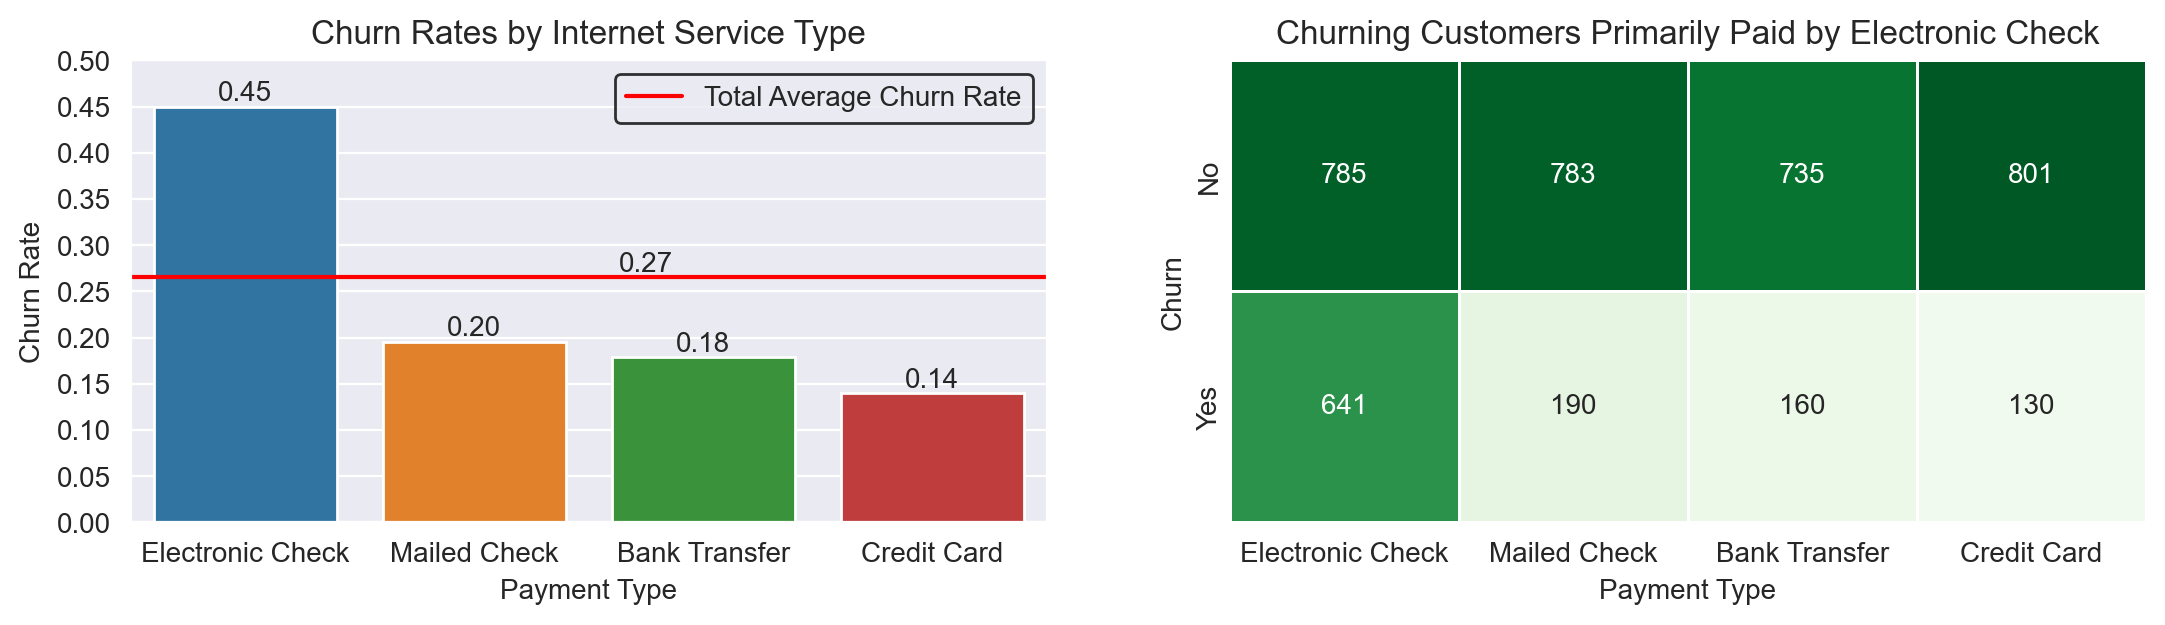

In [43]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(13, 3))

# first plot
order = telco.groupby('payment_type')['churn'].mean().sort_values(ascending=False).index
sns.barplot(x='payment_type', y='churn', data=telco, errorbar=None, order=order, ax=axes[0])
# Annotate the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
axes[0].set_title('Churn Rates by Internet Service Type')
axes[0].set_xlabel('Payment Type')
axes[0].set_xticklabels(['Electronic Check', 'Mailed Check', 'Bank Transfer', 'Credit Card'])
axes[0].set_ylabel('Churn Rate')
axes[0].set_yticks(np.arange(0, .51, 0.05))
# add line indicating estimate of all targets
axes[0].axhline(telco['churn'].mean(), label='Total Average Churn Rate', color='red')
axes[0].annotate(f'{telco["churn"].mean():.2f}', xy=(1.75, telco['churn'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0].legend(loc='upper right', edgecolor='black')

# second plot
sns.heatmap(pd.crosstab(telco['churn'], telco['payment_type'])[order], linewidths=.5, annot=True, fmt='.0f',
            cmap='Greens', vmin=100, vmax=850, ax=axes[1], cbar=False)
axes[1].set_title('Churning Customers Primarily Paid by Electronic Check')
axes[1].set_xlabel('Payment Type')
axes[1].set_xticklabels(['Electronic Check', 'Mailed Check', 'Bank Transfer', 'Credit Card'], rotation=0)
axes[1].set_ylabel('Churn')
axes[1].set_yticklabels(['No', 'Yes'], ha='center')

###### 4. Conclude

Those that pay by electronic check appear to churn around 66% more than the total average churn rate.

---
Contract type relation to churn

###### 2. Visualize

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

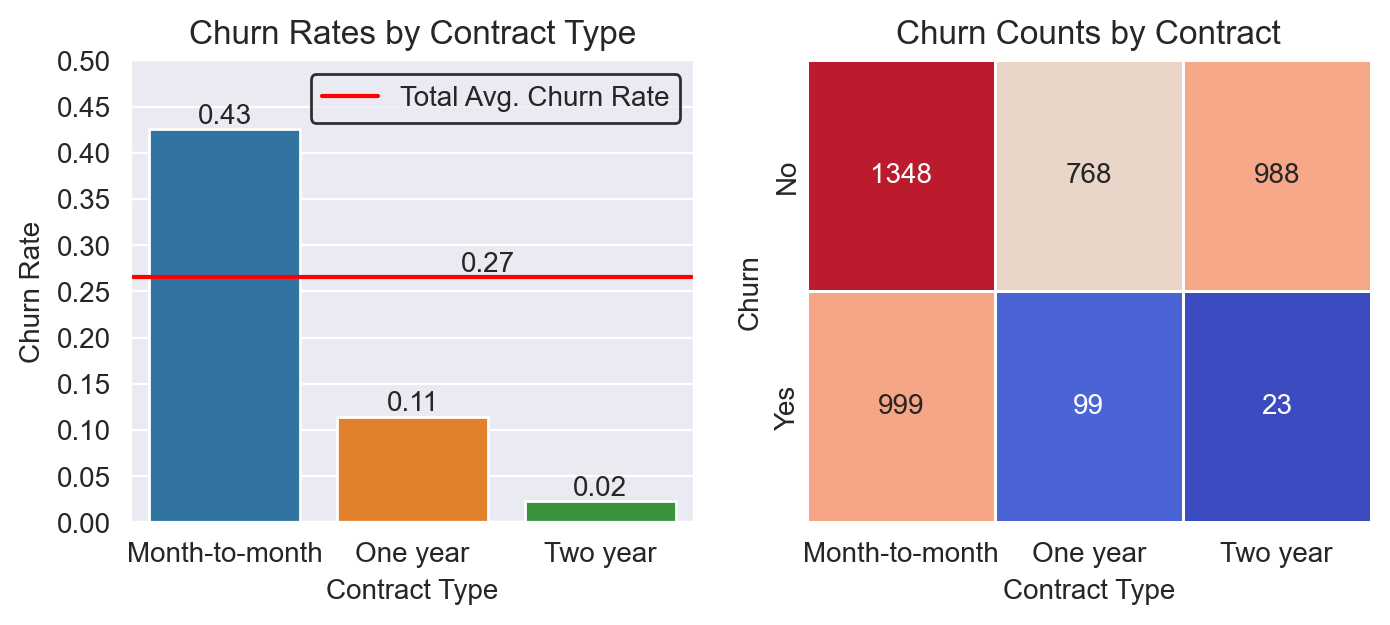

In [372]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# first plot
order = telco.groupby('contract_type')['churn'].mean().sort_values(ascending=False).index
sns.barplot(x='contract_type', y='churn', data=telco, errorbar=None, order=order, ax=axes[0])
# Annotate the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
axes[0].set_title('Churn Rates by Contract Type')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Churn Rate')
axes[0].set_yticks(np.arange(0, .51, 0.05))
# add line indicating estimate of all targets
axes[0].axhline(telco['churn'].mean(), label='Total Avg. Churn Rate', color='red')
axes[0].annotate(f'{telco["churn"].mean():.2f}', xy=(1.4, telco['churn'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0].legend(loc='upper right', edgecolor='black')

# second plot
sns.heatmap(pd.crosstab(telco['churn'], telco['contract_type'])[order],
            cmap='coolwarm', linewidths=.5, annot=True, fmt='.0f',
            vmin=20, vmax=1375, ax=axes[1], cbar=False)
axes[1].set_title('Churn Counts by Contract')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Churn')
axes[1].set_yticklabels(['No', 'Yes'], ha='center')

###### 4. Conclude

Those on month to month contracts churn 60% more than the average total churn rate. Those on two-year contracts rarely churn.

---
Gender relation to churn

###### 2. Visualize

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

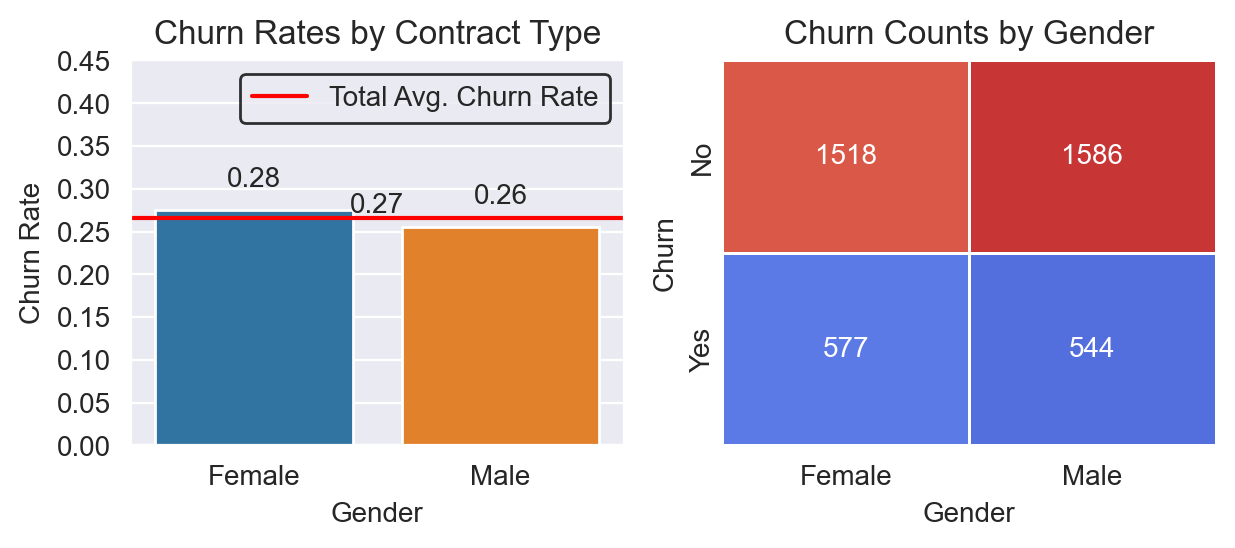

In [368]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))

# first plot
order = telco.groupby('gender_male')['churn'].mean().sort_values(ascending=False).index
sns.barplot(x='gender_male', y='churn', data=telco, errorbar=None, order=order, ax=axes[0])
# Annotate the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height() + .02),
                ha='center', va='bottom')
axes[0].set_title('Churn Rates by Contract Type')
axes[0].set_xlabel('Gender')
axes[0].set_xticklabels(['Female', 'Male'])
axes[0].set_ylabel('Churn Rate')
axes[0].set_yticks(np.arange(0, .46, 0.05))
# add line indicating estimate of all targets
axes[0].axhline(telco['churn'].mean(), label='Total Avg. Churn Rate', color='red')
axes[0].annotate(f'{telco["churn"].mean():.2f}', xy=(.5, telco['churn'].mean()),
                ha='center', va='bottom')
# Display the legend
axes[0].legend(loc='upper right', edgecolor='black')

# second plot
sns.heatmap(pd.crosstab(telco['churn'], telco['gender_male'])[order],
            cmap='coolwarm', linewidths=.5, annot=True, fmt='.0f',
            vmin=450, vmax=1650, ax=axes[1], cbar=False)
axes[1].set_title('Churn Counts by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_xticklabels(['Female', 'Male'])
axes[1].set_ylabel('Churn')
axes[1].set_yticklabels(['No', 'Yes'], ha='center')

###### 4. Conclude

There appears to be little to no difference between the churn rates of males and females.

## Exploration Summary


Key Insights:
- Strong Drivers of Churn:
    - Tenure
    - Contract Type
    - Payment by Electronic Check
- Weak Drivers of Churn:
    - Gender

